# Diseño Experimental

La **ingeniería de diseño experimental** (o diseño de experimentos) es un conjunto de métodos que utilizan el análisis estadístico para determinar si ciertos **factories**, llamados factores, influyen en las **características de un proceso o producto**.

En este capítulo, aprenderá sobre el diseño de experimentos para que pueda explicar los procedimientos de análisis de cada uno de los siguientes métodos de diseño de experimentos:

* Diseño factorial
* Experimento de matriz ortogonal
* Método de múltiples y pseudo niveles utilizando la matriz ortogonal
* Tabla de aleatorización
* Experimento de ramificación
* Método de parcelas divididas
* Método de parcelas divididas utilizando la matriz ortogonal
* Método de curva de respuesta
* Polinómios ortognais

[Audio_1](https://drive.google.com/file/d/1Im4hNlclgdHL-fzNocwS9_0ZC1FG58Bf/view?usp=drive_link)


## 07-01 Diseño Experimental
実験計画法

### 1. Diseño Experimental

En el diseño experimental, mediante el análisis de varianza, se puede obtener la siguiente información.
1. **Prueba**（検定） de efectos de factores
* Se trata de verificar cuáles de los muchos factores tienen una influencia significativa (no despreciable) en las características.
2. **Estimación**（推定） de efectos de factores
* Se trata de evaluar la magnitud de la influencia de esos factores.
3. **Estimación**（推定） de errores
* Se trata de estimar la influencia combinada de los factores restantes, excluyendo aquellos con una influencia significativa.


#### (1) Procedimiento de análisis para un experimento de diseño de dos factores con repeticiones (o con réplicas).
くり返しのある二元配置実験の解析手順

Se llevó a cabo un experimento con dos factores de efectos fijos: el factor A (con $ l $ niveles) y el factor B (con $ m $ niveles), realizando $ r $ repeticiones. Los datos se obtuvieron ejecutando aleatoriamente todas las $ x \times m \times r $ combinaciones de los órdenes experimentales. Se desea que los valores de la característica sean lo más grandes posible.

Paso 1: Fórmula de la estructura de los datos (o Modelo estadístico para los datos).
データの構造式

$ x_{ijk} = \mu + a_i + b_j + (ab)_{ij} + \epsilon_{ijk} $

$ \sum_{i=1}^l a_i = 0 $

$ \sum_{j=1}^m b_j = 0 $

$ \sum_{i=1}^l (ab)_{ij} = \sum_{j=1}^m (ab)_{ij} = 0 $

$ \epsilon_{ijk} \sim N(0, \sigma^2 )$

Paso 2: Cálculo de la suma de cuadrados
平方和の計算

Paso 3: Cálculo de los grados de libertad
自由度の計算

Paso 4: Creación de la tabla de análisis de varianza (o Construcción de la tabla ANOVA)
分散分析表の作成

Paso 5: Consideración sobre la agrupación (pooling：プーリング) y creación de la tabla de análisis de varianza posterior a la agrupación.
プーリングについての検討とプーリング後の分散分析表の作成

En la tabla de análisis de varianza, cuando la interacción AxB **no es significativa** y **F0 es pequeño** y se considera despreciable:

* La guía para el agrupamiento es que el valor de **F0 sea inferior a 2**, o que **no sea significativo con un nivel de significancia de aproximadamente el 20%**.

Paso 6: Estimación de la media poblacional bajo condiciones óptimas
最適条件における母平均の推定

La fórmula estructura del los datos después de la agrupación, ignorando la interacción AxB, es:

$ x_{ijk} = \mu + a_i + b_j + \epsilon_{ijk} $

Estimación puntual en condiciones óptimas:

$ \hat{\mu}(A_2 B_2) = \hat{(\mu + a_2 + b_2)} = \hat{(\mu + a_2)} + \hat{(\mu + b_2)} - \mu $

Estimación por intervalo en condiciones óptimas:

Calcular el **número efectivo de repeticiones** 有効繰り返し数（有効反復数）$ n $, o número efectivo de réplicas, a partir de la suma de los coeficientes utilizados en la estimación puntual (**fórmul a de Ina**伊奈の式).
El número efectivo de repeticiones también se puede calcular mediante la **fórmula de Taguchi**田口の式.

$ \frac{1}{n_e} = \frac{1}{m_r} + \frac{1}{l_r} - \frac{1}{lmr} $

$ \hat{\mu}(A_2 B_2) \pm t(\phi_{E^*}, \alpha) \sqrt{\frac{V_{E^*}}{n_e}} $

[Audio_2](https://drive.google.com/file/d/1eyk_4EUnVYUCy9d3nyddXnS6_F6Svg0C/view?usp=drive_link)


### 2. Experimento de diseño factorial
多元配置実験

Se seleccionan tres factores que afectan a los valores de las características, tomando el factor A con $ l $ niveles, el factor B con $ m $ niveles y el factor C con $ n $ niveles, y se realiza un experimento en **todas las combinaciones**（全ての組み合わせ条件） posibles niveles de los tres factores. Los experimentos se realizan en un **orden aleatorio**（ランダムな順序） de todas las combinaciones. Este tipo de experimento se llama **experimento de diseño trifactorial**（３元配置実験）.

En un experimento de diseño trifactorial, se pueden analizar las interacciones de dos factores como AxB, AxC y BxC, y además, si se repiten las pruebas para cada combinación de niveles, también se puede analizar la **interacción de tres factores**（３因子交互作用） AxBxC.
Además, los experimentos que manejan más de tres factores se llaman **experimentos de diseño factorial múltiple**（多元配置実験）.

[Audio_3](https://drive.google.com/file/d/1z6e0ow8Jf8z0e-iFBpsxeRRsudZkgnrD/view?usp=drive_link)

## 07-02 Experimento de diseño ortogonal
直交配列表実験

### 1.Experimento de diseño de tablas ortogonales

Se puede realizar la prueba de los efectos principales y de las interacciones que se desean analizar con un número reducido de experimentos.
：少ない実験回数で主効果と検討したい交互作用を検定することが出来る直交配列表実験が良く使われる。

Características de los experimentos con tablas ortogonales:
* Permite estudiar muchos factores con un número reducido de experimentos.

* Se pueden probar los efectos principales de los factores considerados y sus interacciones (limitadas, en principio, a interacciones de dos factores).

* Es necesario clasificar de antemano las interacciones en aquellas que se deben considerar y las que se deben ignorar.
：交互作用は事前の情報から「取り上げるモノ」と「無視するもの」に分けておく必要がある。

Existen tablas ortogonales para manejar factores de dos niveles (conocidas como **tabla ortogonal de dos niveles**２水準系直交配列表) y tablas orgonales para manejar factores de tres niveles (conocidas como **tabla ortogonal de tres niveles**３水準系直交配列表).



### 2. Experimento de diseño de tablas ortogonales de dos niveles
２水準直交配列表実験


#### (1) Experimento de diseño de tabla ortogonal de dos niveles

$ L_8(2^7) $ : Símbolo de la matriz
* 8: Número de filas (número de experimentos)
* 2: Dos niveles
* 7: Número de columnas (número máximo de factores que incluyen el error

1. **Asignar**（割り付ける） a cada columna el nombre de un factor (símbolos com A, B, etc.).

2. Al asignar los factores, se determinan las **combinaciones de niveles**（水準組み合わせ） para cada factor a ser ensayado en el experimento (donde 1 y 2 en la tabla representan los **números de nivel**水準番号).

3. Las columnas a las que no se les ha asignado ningún factor, y en las que tampoco aparecen las interacciones consideradas, se convierten en **columnas de error**（誤差列）.

4. Calcular la suma de cuadrados de cada columna. La suma de cuadrados de cada columna se denomina **suma de cuadrados de la columna**（列平方和）.

5. La suma de cuadrados y los grados de libertad del **efecto principal**（主効果） de un factor corresponden a la suma de cuadrados y los grados de libertad de la columna a la que se le asignó ese factor.

6. La suma de cuadrados y los grados de libertad de una **interacción corresponden**（交互作用） a la suma de cuadrados y los grados de libertad de la columna en la que aparece esa interacción.

7. La **suma de cuadrado del errror**（誤差平方和） $ S_E $ es la suma de las sumas de cuadrados de las columnas de error, y los grados de libertad del error $ \phi_E $ son las suma de los grados libertad de las columnas de error.

8. La **suma total de cuadrados**（総平方和） $ S_T $ es igual a la suma de las sumas de cuadrados de todas las columnas, y los **grados de libertad totales**（総自由度） $ \phi_T $ son iguales a la suma de los grados de libertad de todas las columnas.


#### (2) Tratamiento de interacciones
交互作用の扱い

Si solo se consideran los efectos principales y no es necesario tener en cuenta ninguna interacción, los factores seleccionados pueden asignarse a cualquier columna.

1. Solo se considera la **interacción de dos factores**（２因子交互作用のみ）.

2. La presencia o ausencia de la interacción debe **determinarse previamente**（事前に決めておく）.

3. La interacción de dos factores aparece en una **sola columna**（一つの列に）.

  * Cuando los componentes de las columnas asignadas a los factores Y y Z son **p y q** respectivamente, la **interacción YxZ** aparece en la columna cuyo simbolo de componente es p x q. (Se asume que $ a^2 = b^2 = c^2 = ... = 1 $).

4. Los **grados de libertad**（自由度） de la interacción son **1 x 1 =1**.

5. Se debe diseñar cuidadosamente la asignación general de manera que no se asignen otros efectos principales a las columnas donde aparecen las interacciones (para evitar la confusión o el solapamiento).(交互作用が現れた列には他の主効果を割り付けないように（交絡しないように）全体の割り付けを工夫する）



[Audio_4](https://drive.google.com/file/d/1tfyzbmzSoS48TOhbyzDBkFdWf67_A1mc/view?usp=drive_link)

#### (3) Asignación
割り付け

* Uso de la **diagrama de puntos y líneas**（線点図）
* Experimento de arreglo ortogonal L16 (muestreo aleatorio)

1. Elegir un diagrama de líneas y puntos (o gráfico de líneas y puntos) de entre los varios tipos disponibles que pueda representar los factores (efectos principales ) y las interacciones seleccionadas.

2. Encontrar los números de columna a los que se asignan los factores relacionados con una interacción y los números de columna en los que aparecen esas interacciones.

3. Los factores que no están relacionados con interacciones se asignan a las columnas vacías.

4. Todas las columnas a las que no se les ha asignado un factor y en las que no aparece ninguna interacción se convierten en **columnas de error**（誤差列）.

[Audio_5](https://drive.google.com/file/d/1iWUZG6_vkgRQ4e1k7zShKSU3f_lGZTFE/view?usp=drive_link)


In [1]:
import os, sys

try:
  os.chdir('../Python/QCKentei')
except:
  pass
sys.path.append(os.path.abspath(os.path.join("..","Common")))
path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import importlib
from scipy import stats

import anova_utils # type: ignore

import random
from itertools import product

L16直交配列表は、２水準の因子が最大１５個まで扱える直交表（Ortogonal Array）で、交互作用を含めた割り付けを考慮する場合には、割り付け表（alias structure）を参考にして主効果と交互作用が混ざらないようにする必要があります。
* L1〜L6：主因子（A-G）に割り当て
* L7〜L10：交互作用項に割り当て（XOR演算で生成）
* XORを使う理由：交互作用を直交的に生成し、直交性を保ちながら独立に評価できるようにするため。

In [3]:
from pyDOE2 import fullfact
import pandas as pd

# Especificar los niveles de cada factor
levels = [2, 2, 2, 2, 2, 2]  # A: 3 niveles, B～G: 2 niveles

# Generar todas las combinaciones de factores utilizando fullfact
design = fullfact(levels) 

# Convertir los niveles a enteros (0, 1, 2 -> 1, 2, 3)
design = design.astype(int)

# Muestreo aleatorio para obtener el número necesario de filas (hacerlo L16)
design = pd.DataFrame(design, columns=['A', 'B', 'C', 'D', 'F', 'G']).sample(n=16, random_state=42).reset_index(drop=True)

# Step 3: 各因子の割り当て
factor_columns = {
    'A': 'Col1',
    'B': 'Col2',
    'C': 'Col3',
    'D': 'Col4',
    'F': 'Col5',
    'G': 'Col6'
}

# Step 4: 交互作用の定義（XOR演算）
interactions = {
    'AB': ('A', 'B'),
    'AC': ('A', 'C'),
    'DF': ('D', 'F'),
    'DG': ('D', 'G')
}

# Step 6: 交互作用列を追加（XOR演算で生成）
for name, (f1, f2) in interactions.items():
    design[name] = design[f1] ^ design[f2]

design = design + 1

# Mostrar los resultados
print("Tabla de arreglo ortogonal L16 (muestreo aleatorio):")
print(design)

Tabla de arreglo ortogonal L16 (muestreo aleatorio):
    A  B  C  D  F  G  AB  AC  DF  DG
0   1  1  2  1  2  2   1   2   2   2
1   1  2  1  2  2  2   2   1   1   1
2   1  1  1  1  1  1   1   1   1   1
3   1  1  2  2  1  2   1   2   2   1
4   2  1  2  1  1  1   2   1   1   1
5   1  1  2  1  1  2   1   2   1   2
6   1  1  1  1  2  1   1   1   2   1
7   1  1  2  2  1  1   1   2   2   2
8   2  1  1  2  2  1   2   2   1   2
9   2  1  2  2  2  2   2   1   1   1
10  1  1  1  2  2  2   1   1   1   1
11  2  1  1  2  1  1   2   2   2   2
12  1  1  1  2  1  2   1   1   2   1
13  2  1  2  2  1  1   2   1   2   2
14  1  2  1  1  1  2   2   1   1   2
15  1  2  1  1  2  2   2   1   2   2


In [4]:
from anova_utils import Verify # type: ignore

# 検証実行
Verify.verify_l16_table(design)


===== ✅ L16直交表 検証開始 =====

① 各因子・交互作用の水準分布:
  A: {1: 11, 2: 5}
  B: {1: 13, 2: 3}
  C: {1: 9, 2: 7}
  D: {2: 9, 1: 7}
  F: {1: 9, 2: 7}
  G: {2: 9, 1: 7}
  AB: {1: 8, 2: 8}
  AC: {1: 10, 2: 6}
  DF: {2: 8, 1: 8}
  DG: {2: 8, 1: 8}

② 相関係数行列:
       A     B     C     D     F     G    AB    AC    DF    DG
A   1.00 -0.32  0.22  0.32 -0.05 -0.49  0.67  0.03 -0.13  0.13
B  -0.32  1.00 -0.42 -0.22  0.22  0.42  0.48 -0.37 -0.16  0.16
C   0.22 -0.42  1.00  0.02 -0.27  0.02 -0.13  0.36  0.13  0.13
D   0.32 -0.22  0.02  1.00  0.02 -0.02  0.13  0.16  0.13 -0.13
F  -0.05  0.22 -0.27  0.02  1.00  0.27  0.13 -0.16 -0.13 -0.13
G  -0.49  0.42  0.02 -0.02  0.27  1.00 -0.13 -0.10 -0.13 -0.13
AB  0.67  0.48 -0.13  0.13  0.13 -0.13  1.00 -0.26 -0.25  0.25
AC  0.03 -0.37  0.36  0.16 -0.16 -0.10 -0.26  1.00  0.26  0.52
DF -0.13 -0.16  0.13  0.13 -0.13 -0.13 -0.25  0.26  1.00  0.25
DG  0.13  0.16  0.13 -0.13 -0.13 -0.13  0.25  0.52  0.25  1.00

③ 実験行列のランク確認:
  ランク = 10 / 列数 = 10
  ✅ 全列が線形独立です（直交性OK）

④ 列名の重複

## 7.1 

Q社では機械部品の強度を高めるため強度に影響を及ぼすと考えられる母数因子A、B、C、D、F、Gの6つを取り上げ、いずれも2水準で実験を行った。交互作用としては、AxB、AxC、DxF、DxGの4つが技術的に考えられる。L16直交配列表実験とし、16回の実験はランダムな順序で行った。主効果の割り付けと得られたデータを表7.2に示す。なお、値は大きい方が望ましい。以下の設問に答えよ。
1. データの構造式を示せ
4. 分散分析表を作成せよ
5. プーリング後の分散分析表を作成せよ
6. 分散分析後のデータ構造式を示し、最適条件を求めよ
7. 最適条件における母平均を点推定し、信頼率95%で区間推定せよ


La empresa Q realizó experimentos para aumentar la resistencia de piezas mecánicas, tomando en cuenta seis factores principales que se consideran influyentes en la resistencia: A, B, C, D, F y G, todos ellos con 2 niveles. Como interacciones, se consideran técnicamente AxB, AxC, DxF y DxG. Se utilizó un experimento de arreglo ortogonal L16, y los 16 experimentos se realizaron en un orden aleatorio. La asignación de los efectos principales y los datos obtenidos se muestran en la tabla 7.2. Cabe señalar que es preferible que los valores sean mayores. Responda las siguientes preguntas.
1. Mostrar la estructura de los datos.
4. Elaborar la tabla de análisis de varianza
5. Elaborar la tabla de análisis de varianza después de la agrupación (pooling)
6. Mostrar la estructura de los datos después del análisis de varianza y determinar las condiciones óptimas
7. Realizar la estimación puntual de la media poblacional bajo las condiciones óptimas y realizar una estimación de intervalo con un nivel de confianza del 95%



In [5]:
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet13") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(df.columns[0], axis=1)
df = df.apply(pd.to_numeric)

df0 = df.copy()
data = df.copy()

In [6]:
import webbrowser

url = "https://docs.google.com/spreadsheets/d/" + SPREADSHEET_ID 
#webbrowser.open(url)

#### 1. Estructura de los datos

$ x = \mu + a + b + c + d + f + g + (ab) + (ac) + (df) + (dg) + \epsilon  $

Restricciones:

$ \sum a = \sum b = \sum c = \sum d = \sum f = \sum g = 0 $

$ \sum (ab) = \sum (df) = \sum (dg) = 0 $

$ \sum (ab) = (ab)_{11} + (ab)_{12} = (ab)_{21} + (ab)_{22} = (ab)_{11} + (ab)_{21} = (ab)_{12} + (ab)_{22} = 0 $

$ \epsilon \sim N(0, \sigma^2) $

#### 2. Columnas de interacciones y de error



ロジカルソート（選点図順）とは、線点図で因子をa,b,c,dに割り当てたときに生成される順序で、直交配列表の論理構造に対応している。
実験計画法や品質工学における混同構造の可視化や割り付け計画に置いて不可欠です。

In [7]:
from itertools import product

def generate_logical_order(basis=['a', 'b', 'c', 'd']):
    """
    線点図に基づく論理順を生成（a, b, ab, c, ac, bc, abc, ..., abcd）
    """
    n = len(basis)
    order = []
    for bits in range(1, 2**n):
        # bits の 1 の位置に対応する文字を選ぶ（例：bits=3 -> ab）
        comb = ''.join([basis[i] for i in range(n) if (bits >> i) & 1])
        order.append(comb)
    return order

def logical_sort(df, basis=['a', 'b', 'c', 'd']):
    logical_order = generate_logical_order(basis)
    order = [c for c in logical_order if c in df.columns]
    others = [c for c in df.columns if c not in order]
    return order + others


# 1. 因子名と成分の割り付け辞書（例：教科書のL8の例など）
# ※ これはユーザーの設計によって異なる
factor_to_component = {
    'A': 'a',
    'B': 'b',
    'F': 'c',
    'G': 'ac',
    'C': 'd',
    'D': 'abd',
    'AB':'ab',
    'AC':'ad',
    'DG':'bcd',
    'DF':'abcd',
}

In [8]:
# Step 4: 交互作用の定義（XOR演算）
interactions = {
    'AB': ('A', 'B'),
    'AC': ('A', 'C'),
    'DF': ('D', 'F'),
    'DG': ('D', 'G')
}
# Step 6: 交互作用列を追加（XOR演算で生成）
for name, (f1, f2) in interactions.items():
    df0[name] = ((df0[f1]-1) ^ (df0[f2]-1)) + 1

# 2. df.columns から対応する成分を取り出す
component_list = [factor_to_component.get(col, col.lower()) for col in df0.columns]

data = df0.T
data['compnents'] = component_list
data = data.T

In [9]:
df00 = data.copy()

# 1. カラム名をリストにして新しいDataFrame（1行）を作る
header_row = pd.DataFrame([df00.columns.tolist()], columns=df00.columns)
# 2. データ本体と結合（インデックス無視）
df00 = pd.concat([header_row, df00], ignore_index=True)

df00.columns = df00.iloc[-1].to_list()

sorted_cols = logical_sort(df00, basis=['a','b','c','d'])
df00 = df00[sorted_cols]

df00.columns = df00.iloc[0]

# 2. 最初の行を削除してデータだけにする
df00 = df00[1:].reset_index(drop=True)
data = df00.copy()

print('Tabla 7.2 Asignacíon y datos')
print(data)

Tabla 7.2 Asignacíon y datos
0   A  B  AB  F   G  C  AC    D   DG    DF    y
0   1  1   1  1   1  1   1    1    1     1   52
1   1  1   1  1   1  2   2    2    2     2  103
2   1  1   1  2   2  1   1    1    2     2   50
3   1  1   1  2   2  2   2    2    1     1  166
4   1  2   2  1   1  1   1    2    2     2  124
5   1  2   2  1   1  2   2    1    1     1   87
6   1  2   2  2   2  1   1    2    1     1  187
7   1  2   2  2   2  2   2    1    2     2   41
8   2  1   2  1   2  1   2    2    1     2  185
9   2  1   2  1   2  2   1    1    2     1  125
10  2  1   2  2   1  1   2    2    2     1  223
11  2  1   2  2   1  2   1    1    1     2  131
12  2  2   1  1   2  1   2    1    2     1  134
13  2  2   1  1   2  2   1    2    1     2   77
14  2  2   1  2   1  1   2    1    1     2   65
15  2  2   1  2   1  2   1    2    2     1  154
16  a  b  ab  c  ac  d  ad  abd  bcd  abcd    y


#### 4. Tabla de análisis de varianza (ANOVA)
分散分析表の作成

In [10]:
# Definición del modelo de regresión
formula = 'y ~ A + B + C + D + F + G + A:B + A:C + D:F + D:G'

# Realización del análisis de regresión
model = ols(formula, data=df).fit()

# Elaboración de la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model)

# Mostrar los resultados
print("\nTabla 7.5 Tabla de análisis de varianza:")
print(anova_table)


Tabla 7.5 Tabla de análisis de varianza:
           df    sum_sq   mean_sq          F    PR(>F)
A         1.0   5041.00   5041.00   6.312692  0.053663
B         1.0   1722.25   1722.25   2.156722  0.201883
C         1.0   1156.00   1156.00   1.447624  0.282766
D         1.0  17822.25  17822.25  22.318264  0.005223
F         1.0   1056.25   1056.25   1.322710  0.302125
G         1.0     42.25     42.25   0.052908  0.827192
A:B       1.0   5700.25   5700.25   7.138251  0.044256
A:C       1.0    676.00    676.00   0.846534  0.399749
D:F       1.0   7744.00   7744.00   9.697577  0.026428
D:G       1.0      1.00      1.00   0.001252  0.973140
Residual  5.0   3992.75    798.55        NaN       NaN


Los efectos principales A y B no se agrupan debido a que sus valores F0 no son pequeños.

Además, el efecto principal F tampoco se agrupa, ya que la interacción DxF no se agrupa.

Se agrupan en el término de error los efectos principales C y G, las interacciones AxC y DxG, que tienen valores F0 pequeños, para crear una tabla de análisis de varianza.


#### 5. Elaborar la tabla de análisis de varianza después de la agrupación (pooling)

Como resultado del análisis de varianza (ANOVA), el efecto principal D y la interacción DxF fueron altamente significativos, mientras que el efecto principal A y la interacción AxB fueron significativos.

In [11]:
def pool(anova_table, pool_factors, pool_):
  # Calcular el error agrupado (pooling)
  pooled_error_ss = anova_table.loc[pool_factors, 'sum_sq'].sum()  # Calucar el error agrupado (pooling)
  pooled_error_df = anova_table.loc[pool_factors, 'df'].sum()      # Calucar el grados de libertad agrupado (pooling)

  # Tabla de análisis de varianza de los factores
  anova_table = anova_table.drop(index=pool_factors)

  # Actualizar el término de error
  anova_table.loc[pool_] = [
      anova_table.loc[pool_, 'sum_sq'] + pooled_error_ss,  # Nueva suma de cuadrados del error
      anova_table.loc[pool_, 'df'] + pooled_error_df,      # Nuevos grados de libertad
      None,  # Mean Square
      None   # F-statistic
  ]

  # Calcular la media de los cuadrados
  anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']

  # Calcular el valor F
  anova_table['F'] = anova_table['mean_sq'] / anova_table.loc['Residual', 'mean_sq']

  # Calcular el valor p
  anova_table['PR(>F)'] = stats.f.sf(anova_table['F'], anova_table['df'], anova_table.loc['Residual', 'df'])

  return anova_table

In [12]:
# Obtener la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = pool(anova_table,['C', 'G', 'A:C', 'D:G'], 'Residual')

# Mostrar los resultados
print("Tabla 7.6 Tabla de análisis de varianza (después de pooling):")
print(anova_table)

Tabla 7.6 Tabla de análisis de varianza (después de pooling):
            sum_sq   df          F    PR(>F)   mean_sq
A          5041.00  1.0   7.731595  0.021381   5041.00
B          1722.25  1.0   2.641488  0.138551   1722.25
D         17822.25  1.0  27.334739  0.000543  17822.25
F          1056.25  1.0   1.620015  0.234984   1056.25
A:B        5700.25  1.0   8.742715  0.016042   5700.25
D:F        7744.00  1.0  11.877301  0.007317   7744.00
Residual   5868.00  9.0   1.000000  0.500000    652.00


#### 6. Estructura de los datos después del análisis de varianza
: 最適条件の選定

* Fórmula estructural

  * $ x = \mu + a + b + d + f + (ab) + (df) + ϵ $



* Condiciones óptimas:
最適条件

  * $ A_2 B_1 D_2 F_2 $

In [13]:
from anova_utils import Optim # type: ignore
#
factores = ['A', 'B', 'D', 'F']
pares_interaccion = [['A', 'B'], ['D', 'F']]

# ① 最適水準の組み合わせを求める
niveles_optimos = Optim.obtener_niveles_optimos(df, factores)

print("✅ Niveles óptimos de cada factor:")
for f, n in niveles_optimos.items():
    print(f"Factor {f}: nivel {n}")

✅ Niveles óptimos de cada factor:
Factor A: nivel 2
Factor B: nivel 1
Factor D: nivel 2
Factor F: nivel 2


#### 7. Estimación puntual del media poblacional en las condiciones óptimas

Estimación puntual
：点推定
* $ \hat{\mu}(A_2 B_1 D_2 F_2) = \mu + a_2 + b_1 + d_1 + f_2 + (ab)_{21} + (df)_{22} $
$ \qquad = \hat{(\mu + a + b + (ab))} + \hat{(\mu + d + f + (df))} - \hat{\mu} $

Estimación por intervalos (con un nivel de confianza del 95%)
：区間推定（信頼率９５％）

* $ \hat{\mu}(A_2 B_1 D_2 F_2) \pm t(\phi_E, 0.05) \sqrt{V_E / n_2} $

In [14]:
# 7. Estimación puntual del media poblacional en las condiciones óptimas
media_optima = Optim.estimar_media_optima_2(df, pares_interaccion)
print(f"\n✅ Estimación de la media poblacional en las condiciones óptimas: {media_optima:.1f}")

# Número efecto de repeticiones (Fórmula de Taguchi
N = len(df)
s = 1
for i in ['A','B','D','F','A:B','D:F']:
  s += anova_table.loc[i,'df']
ne = s/N

# Varianza del error
Ve = anova_table.loc['Residual','mean_sq']
df2= anova_table.loc['Residual','df']

p = 0.05
t_value = stats.t.ppf(1 - p/2, df=df2)

S = (ne*Ve)**0.5

UL = media_optima + t_value*S
LL = media_optima - t_value*S

print(f"\n✅ Intervalo de confianza del 95%: ({LL:.1f}, {UL:.1f})")


✅ Estimación de la media poblacional en las condiciones óptimas: 229.5

✅ Intervalo de confianza del 95%: (191.3, 267.7)


### 3.  Experimento con arreglo ortogonal de 3 niveles
３水準系直交配列表実験

#### (1) Experimento con arreglo ortogonal de 3 niveles

En el experimento con arreglo ortogonal de 3 niveles, se manejan factores de 3 niveles.
El concepto y el método de análisis son casi los mismos que en el caso de 2 niveles, pero hay una diferencia importante: el **grado de libertad** del efecto principal de un factor de 3 niveles es 2, por lo que el grado de libertad de **una sola columna es 2**（一つの列の自由度が２）, y el **grado de libertad de una interacción es 2x2=4**（交互作用の自由度が2x2=4）.
Debido a esto, la interacción aparece en **dos columnas**（２つの列）.

$ L_{27} (3^{13}) :$

27: Número de filas como número de experimentos

3: Sistema de 3 niveles

13: Número de columnas

La suma de cuadrados y los grados de libertad de una interacción de dos factores son la **suma de las sumas de cuadrados y los grados de libertad de las dos columnas**（２つの列の平方和と自由度の和） en las que se produce la interacción.
Por lo tanto, los grados de libertad par la interacción de dos factores son **4**.



### (2) Manejo y asignación de las interacciones
交互作用の扱いと割り付け

Para el caso de considerar únicamente las interacciones y no tener en cuenta ninguna interacción, los factores considerados pueden asignarse a cualquier columna.
Si es necesario considerar las interacciones, se debe prestar atención a los siguientes puntos.

1. Considerar solo las **interacciones de dos factores**（２因子交互作用のみ）.

2. Examinar y **decidir de antemano**（事前に決めておく） las interacciones que se deben considerar.

3. Las interacciones de dos factores aparecen en **dos columnas**（２つの列）, de acuerdo con las siguientes reglas.

* Cuando los símbolos de los componentes de las columnas asignadas a los factores X y Z son p y q, respectivamente, la interacción $ X \times Y $ aparece en dos columnas cuyos símbolos de componentes son $ p \times q $ y $ p \times q^2 $. Aquí, se asume que $ a^2 = b^2 = c^2 ... = 1 $. Si no se encuentra una columna correspondiente mediante este procedimiento, se considera el cuadrado de los componentes obtenidos, es decir $ (pq)^2 $ o $ (pq^2)^2 $.



[Audio_6](https://drive.google.com/file/d/1gYzqrEBwj_A6R1KxTgAwrR6NNR8dpZSt/view?usp=drive_link)


### 7.2

Q社では、水中の残留成分の低減に取り組むことになった。残留成分に影響を与えると考えられるA、B、C、D、Fの五つの母数因子（各3水準）を取り上げ、$ L_{27} $ 直交配列表により実験した。

交互作用は、技術的に見てAxB、AxD、AxFの３つが考えられる。27回の実験はランダムな順序で行った。主効果の割り付けと得られたデータ表を表7.9に示す。値は小さい方が望ましい。以下の設問に答えよ。

2. 分散分析表を作成し、プーリングについて検討せよ

En la empresa Q, se ha decidido trabajar en la reducción de los componentes residuales en el agua. Se seleccionaron cinco factores poblacionales (A, B, C, D y F), cada uno con 3 niveles, que se consideran influyentes en los componentes residuales, y se realizó el experimento utilizando un arreglo ortogonal L27.

Las interacciones que se consideran posibles desde el punto de vista técnico son tres: AxB, AxD y AxF. Los 27 experimentos se realizaron en un orden aleatorio. La asignación de los efectos principales y tabla de datos obtenidos se muestran en la Tabla 7.9. Se desea que los valores sean lo más pequeños posible. Responda a las siguientes preguntas.

2. Elabora la tabla de análisis de varianza y examina la posibilidad de pooling.


In [15]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet15") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(df.columns[0], axis=1)

df['x'] = df['x'].apply(pd.to_numeric)
df0 = df.copy()

data = df.copy()

In [16]:
df2 = df.iloc[:,:-1]
dfx = df.iloc[:,-1:]
df2 = df2.apply(pd.to_numeric)
df2 = df2 -1

# Step 4: 交互作用の定義
interactions = {
    'AB': ('A', 'B'),
    'AD': ('A', 'D'),
    'AF': ('A', 'F'),
}
# Step 6: 交互作用列を追加
for name, (f1, f2) in interactions.items():
    df2[name + '1'] = (df2[f1] + df2[f2]) % 3
    df2[name + '2'] = (df2[f1] + 2*df2[f2]) % 3
df2 = df2 + 1
df2['x'] = dfx

In [17]:
import re
from typing import List

def parse_exponents(label: str) -> str:
    """指数付きの記法を展開（例：ab^2 → abb）"""
    pattern = r'([a-zA-Z])(?:\^(\d+))?'
    expanded = ''
    for match in re.finditer(pattern, label):
        factor, exp = match.groups()
        count = int(exp) if exp else 1
        expanded += factor * count
    return expanded

def reconstruct_label(expanded: str) -> str:
    """展開された文字列（abbcc）を指数付き記法に戻す（ab^2c^2）"""
    from collections import Counter
    counts = Counter(expanded)
    return ''.join(
        f"{ch}" if counts[ch] == 1 else f"{ch}^{counts[ch]}"
        for ch in sorted(counts)
    )

In [18]:
def create_dict_from_arrays(A, B):
    if len(A) != len(B):
        raise ValueError("配列Aと配列Bの長さは一致していなければなりません。")
    
    C = {A[i]: B[i] for i in range(len(A))}
    return C

In [19]:
from typing import List

def logical_sort_by_last_char(components: List[str], factor_order: List[str]) -> List[str]:
    priority = {f: i for i, f in enumerate(factor_order)}

    def sort_key(comp: str):
        reversed_factors = sorted(set(comp), key=lambda x: priority.get(x, 999), reverse=True)
        last_char_priority = priority.get(comp[-1], 999)
        return (
            last_char_priority,                      # 1. 最後の文字の優先度
            [priority.get(ch, 999) for ch in reversed_factors],  # 2. 逆順因子優先度
            len(comp),                               # 3. 重複含む長さ
            comp                                     # 4. 元文字列（安定化）
        )

    return sorted(components, key=sort_key)

In [20]:
from anova_utils import DicUtils # type: ignore #
# 1. 因子名と成分の割り付け辞書（例：教科書のL8の例など）
# ※ これはユーザーの設計によって異なる

A = ['A', 'B', 'F', 'G', 'D', 'AB1', 'AB2', 'AD1', 'AD2', 'AF1', 'AF2', 'x']
B = ['a','c','bc^2','bc','b','ac','ac^2','ab','ab^2','abc^2','ab^2c','x']
C = DicUtils.create_dict_from_arrays(A, B)

factor_to_component = C

# 2. df.columns から対応する成分を取り出す
component_list = [factor_to_component.get(col, col.lower()) for col in df2.columns]

In [21]:
df00 = df2.copy()

# 1. カラム名をリストにして新しいDataFrame（1行）を作る
header_row = pd.DataFrame([df00.columns.tolist()], columns=df00.columns)

# 2. データ本体と結合（インデックス無視）
df00 = pd.concat([header_row, df00], ignore_index=True)

df00.columns = component_list

In [22]:
import anova_utils # type: ignore
importlib.reload(anova_utils)
from anova_utils import LogicalSort # type: ignore

components = component_list
factor_order = ['a', 'b', 'c', 'g']

sorted_result = LogicalSort.logical_sort_with_exponents(components, factor_order)
df00 = df00[sorted_result]
df00.loc['Components'] = df00.columns.to_list()

# 2. 最初の行をColumnsに、その後削除してデータだけにする
df00.columns = df00.loc[0]
df00 = df00[1:].reset_index(drop=True)

data = df00.copy()

print('Tabla 7.9 Asignacíon y datos')
print(data)

Tabla 7.9 Asignacíon y datos
0   A  D AD1   AD2  B AB1   AB2   G     F    AF2    AF1     x
0   1  1   1     1  1   1     1   1     1      1      1  0.63
1   1  1   1     1  2   2     3   2     2      3      2  0.64
2   1  1   1     1  3   3     2   3     3      2      3  0.27
3   1  2   2     3  1   1     1   2     3      2      3  0.52
4   1  2   2     3  2   2     3   3     1      1      1  0.48
5   1  2   2     3  3   3     2   1     2      3      2  0.61
6   1  3   3     2  1   1     1   3     2      3      2  0.75
7   1  3   3     2  2   2     3   1     3      2      3  0.42
8   1  3   3     2  3   3     2   2     1      1      1  0.46
9   2  1   2     2  1   2     2   1     1      2      2  0.59
10  2  1   2     2  2   3     1   2     2      1      3  0.68
11  2  1   2     2  3   1     3   3     3      3      1  0.49
12  2  2   3     1  1   2     2   2     3      3      1  0.46
13  2  2   3     1  2   3     1   3     1      2      2  0.66
14  2  2   3     1  3   1     3   1     2

In [23]:

data.to_excel('Data_1/data15.xlsx')

df3 = data.copy()
df3 = df3.iloc[:-1,:]
df3['x'] = df3['x'].astype(float)
df3 = df3.rename(columns={'x': 'y'})


#### 2. Crear la tabla de análisis de varianza (ANOVA):

Hay que tener en cuenta que los **grados de libertad** para los efectos principales serán **2**, y para la interacción, serán **4**.

In [24]:
# Convertir los factores en tipo categórico
factors = df.columns.tolist()
for factor in factors[:-1]:
    df[factor] = df[factor].astype('category')

# Crear un modelo de análisis de
model = ols('x ~ A + B + G + D + F + A:B + A:D + A:F', data=df).fit()

# Elaboración de la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model)

# Mostrar los resultados
print(anova_table)

           df    sum_sq   mean_sq          F    PR(>F)
A         2.0  0.122007  0.061004  10.142241  0.027131
B         2.0  0.031296  0.015648   2.601601  0.188904
G         2.0  0.002941  0.001470   0.244458  0.794030
D         2.0  0.032807  0.016404   2.727217  0.178998
F         2.0  0.420230  0.210115  34.932882  0.002932
A:B       4.0  0.083370  0.020843   3.465209  0.128001
A:D       4.0  0.067926  0.016981   2.823276  0.169448
A:F       4.0  0.045170  0.011293   1.877463  0.278382
Residual  4.0  0.024059  0.006015        NaN       NaN


El efecto principal F resultó altamente significativo, y el efecto principal A fue significativo. Los efectos principales B, D y las interacciones AxB, AxD no fueron significativos, pero dado que sus valores F0 son superiores a 2, no se agruparán. El efecto principal C y la interacción AxF no fueron significativos, y sus valores F0 también son inferiores a 2, por lo que se agruparán en el término de error para crear la tabla ANOVA (después del agrupamiento).

In [25]:
# Obtener la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = Pooling.pool(anova_table,['G', 'A:F'], 'Residual')

# Mostrar los resultados
print("Tabla de análisis de varianza (después de pooling):")
print(anova_table)

NameError: name 'Pooling' is not defined

Realizar un análisis de regresión y crear una tabla ANOVA, basándose en la asignación de un arreglo ortogonal de 3 niveles y los datos.

In [ ]:
# Crear un modelo de análisis de
model = ols('y ~ A + B + D + F + AB1 + AB2 + AD1 + AD2', data=df3).fit()

# Elaboración de la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model)

# Mostrar los resultados
print(anova_table)

            df    sum_sq   mean_sq          F    PR(>F)
A          2.0  0.122007  0.061004   8.452735  0.007092
B          2.0  0.031296  0.015648   2.168223  0.165117
D          2.0  0.032807  0.016404   2.272914  0.153570
F          2.0  0.420230  0.210115  29.113723  0.000068
AB1        2.0  0.011052  0.005526   0.765678  0.490454
AB2        2.0  0.072319  0.036159   5.010264  0.031090
AD1        2.0  0.030585  0.015293   2.118957  0.170910
AD2        2.0  0.037341  0.018670   2.586986  0.124309
Residual  10.0  0.072170  0.007217        NaN       NaN


In [ ]:
from anova import Anova11 # type: ignore

anova = Anova11(df3, p=0)
anova_table, message = anova.creacion_ANOVA11()


【手動による分散分析表】
            sum_sq  df   mean_sq           F    PR(>F)
Factor                                                
A         0.122007   2  0.061004   38.033405  0.000001
D         0.032807   2  0.016404   10.227063  0.001578
AD1       0.030585   2  0.015293    9.534329  0.002128
AD2       0.037341   2  0.018670   11.640240  0.000888
B         0.031296   2  0.015648    9.756004  0.001932
AB1       0.011052   2  0.005526    3.445197  0.058720
AB2       0.072319   2  0.036159   22.543873  0.000030
G         0.002941   2  0.001470    0.916718  0.421103
F         0.420230   2  0.210115  130.998307  0.000000
AF2       0.035341   2  0.017670   11.016780  0.001138
AF1       0.009830   2  0.004915    3.064193  0.076593
Residual  0.024059  15  0.001604         NaN       NaN


In [ ]:
from anova_utils import Optim # type: ignore
#
factores = ['A', 'B', 'D', 'F']
pares_interaccion = [['A', 'B'], ['A', 'D']]

# ① 最適水準の組み合わせを求める
niveles_optimos = Optim.obtener_niveles_optimos(df3, factores)
print("✅ El nivel óptimo de cada factor:")
for f, n in niveles_optimos.items():
    print(f"Factor {f}: nivel {n}")

✅ El nivel óptimo de cada factor:
Factor A: nivel 2
Factor B: nivel 1
Factor D: nivel 3
Factor F: nivel 2


## 07-03 Método de múltiples niveles y Método cuasi-nivelado
多水準法・擬水準法

#### 1. Método de múltiples niveles y Método cuasi-nivelado

Al realizar experimentos utilizando tablas de diseño ortogonal, puede haber casos en los que sea difícil o inconveniente unificar todos los factores a dos o tres niveles.
En tales casos, también es posible realizar experimentos utilizando factores con nun número de niveles diferente al de la mayoría de los otros factores.


#### 2. Método de múltiples niveles utilizando una tabla ortogonal de dos niveles
２水準直交配列表を用いた多水準法

La clave es asignar factores de cuatro niveles a una tabla ortogonal de dos niveles.

Dado que un factor de cuatro niveles tiene tres grados de libertad, se requieren tres columnas para asignarlo.
Sin embargo, no se puede simplemente elegir tres columnas cualesquiera; es necesario **seleccionar tres columnas que tengan una relación de efectos principales e interacción entre sí**（互いに主効果と交互作用の関係にある３つの列）.


[Audio_7](https://drive.google.com/file/d/1x7le_ikVESo95c61LeJg6Unp_DxXS9uI/view?usp=drive_link)

In [ ]:
# データの準備
index1 = [1, 1, 2, 2]
index2 = [1, 2, 1, 2]
index3 = [1, 2, 2, 1]
data = ['A1', 'A2', 'A3', 'A4']

# MultiIndexを作成
index = pd.MultiIndex.from_arrays([index1, index2, index3], names=['[1]', '[2]', '[3]'])

# DataFrameを作成
df = pd.DataFrame(data, index=index, columns=['Factor A  (4 niveles)'])

# 表示
print(df)


            Factor A  (4 niveles)
[1] [2] [3]                      
1   1   1                      A1
    2   2                      A2
2   1   2                      A3
    2   1                      A4


#### 3. Método cuasi-nivelado utilizando una tabla ortogonal de tres niveles
３水準直行配列表を用いた擬水準法

Puedes asignar factores de dos niveles a una matriz ortogonal de tres niveles. 
Para ello, asigna un factor ficticio de tres niveles a la matriz ortogonal de tres niveles de la forma habitual.
A continuación, puedes asignar los factores de dos niveles considerando dos de los tres niveles como un solo factor de dos niveles.
A estos niveles se les conoce como pseudoniveles.

In [ ]:
# データの準備
index = [1, 2, 3]
data = [['P1','A1'],['P2','A2'],['P3','A2']]


# DataFrameを作成
df = pd.DataFrame(data, index=index)
df.columns=[
        'Provisionales del factor P (3 niveles)',
        'Factora A (2 niveles)']
df.index.name = ('[1]')
# 表示
display(df)

,Provisionales del factor P (3 niveles),Factora A (2 niveles)
[1],,
1,P1,A1
2,P2,A2
3,P3,A2


#### 4. Método cuasi-nivelado utilizando una tabla ortogonal de dos niveles
２水準直交配列表を用いた擬水準法

También es posible asignar factores de tres niveles a una matriz ortogonal de dos niveles.
Para ello, primero asignar un factor ficticio de cuatro niveles usando el método de multinivel.
Luego, puedes asignar los factores de tres niveles considerando dos de los cuatro niveles como un solo factor de tres niveles.
Uno de los cuatro niveles del factor ficticio de cuatro niveles se propondrá con los otros niveles.

In [ ]:
# データの準備
index1 = [1, 1, 2, 2]
index2 = [1, 2, 1, 2]
index3 = [1, 2, 2, 1]
data = [['P1','A1'],['P2','A2'],['P3','A2'],['P4','A3']]

# MultiIndexを作成
index = pd.MultiIndex.from_arrays([index1, index2, index3], names=['[1]', '[2]', '[3]'])

# DataFrameを作成
df = pd.DataFrame(data, index=index, columns=['Provisional de Factor P (4 nivel)',
'Factor A (3 nivel)'])

# 表示
display(df)

Provisional de Factor P (4 nivel) Factor A (3 nivel)
[1] [2] [3]                                                     
1   1   1                                  P1                 A1
    2   2                                  P2                 A2
2   1   2                                  P3                 A2
    2   1                                  P4                 A3

### 7.3
Q社では、塗料の付着性に影響するA、B、C、D、F、Gの6つの母数因子を取り上げ実験を行った。Aは３水準とし、他は２水準とした。交互作用はAxB、AxC、BxCの三つが技術的に考えられるため、L16直交配列表実験とし、１６回の実験はランダムな順序で行い、割り付けと得られたデータ表を7.14に示す。値は大きい方が望ましい。

2. 分散分析表を完成させよ。

En la empresa Q, se realizó un experimento considerando seis factores principales que afectan la adherencia de la pintura: A, B, C, D, F y G. El factor A se estableció en tres niveles, mientras que los demás dos niveles. Dado que técnicamente se consideran posibles tres interacciones: AxB, AxC y BxC, se llevó a cabo un experimento utilizando la tabla ortogonal L16. Los ensayos se realizaron en un orden aleatorio. La asignación y los datos obtenidos se muestran en la Tabla 7.14. Un valor es más deseable.

2. Calcule cada suma de cuadrados y compute la tabla de análisis de varianza.

In [ ]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet14") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(df.columns[0], axis=1)

df = df.apply(pd.to_numeric)
df0 = df.copy()
# Definir los nombres de los factores
factors = df.columns.tolist()

yy = [29,17,22,10,29,35,26,28,13,35,46,60,21,13,46,66]

df['y'] = yy

data = df.copy()

data = data.T
data['No'] = ['-','[1]','[2]','[4]','[8]','[11]','[13]','[15]','-']
data['Compo'] = ['-', 'a','b','c','d', 'abd', 'acd', 'abcd','-']
data = data.T

data.to_excel('Data_1/data14.xlsx')

print('Tabla 7.14 Asignación y datos')
print(data)

Tabla 7.14 Asignacíon y datos
0      A   P1   P2    C    B     D     F     G   y
1      1    1    1    1    1     1     1     1  29
2      1    1    1    2    1     2     2     2  17
3      2    1    2    1    1     1     2     2  22
4      2    1    2    2    1     2     1     1  10
5      3    2    1    1    1     2     1     2  29
6      3    2    1    2    1     1     2     1  35
7      2    2    2    1    1     2     2     1  26
8      2    2    2    2    1     1     1     2  28
9      1    1    1    1    2     2     2     2  13
10     1    1    1    2    2     1     1     1  35
11     2    1    2    1    2     2     1     1  46
12     2    1    2    2    2     1     2     2  60
13     3    2    1    1    2     1     2     1  21
14     3    2    1    2    2     2     1     2  13
15     2    2    2    1    2     1     1     2  46
16     2    2    2    2    2     2     2     1  66
No     -  [1]  [2]  [4]  [8]  [11]  [13]  [15]   -
Compo  -    a    b    c    d   abd   acd  abcd   -


Como resultado del análisis de varianza (ANOVA), el efecto principal B y la interacción AxB resultaron ser significativos.

In [ ]:
# Tabla ortogonal L16 (A: 3 niveles, los demás: 2 niveles)

# Convertir los factores al tipo categórico
for factor in factors:
    df[factor] = df[factor].astype('category')

model = ols('y ~ A + B + C + D + F + G + A:B + A:C + B:C', data=df).fit()

# Crear la tabla de análisis de varianza (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar los resultados
print("Tabla 7.19 Tabla de análisis de varianza (ANOVA):")
print(anova_table)

Tabla 7.19 Tabla de análisis de varianza (ANOVA):
          sum_sq   df          F    PR(>F)
A          786.0  2.0   6.550000  0.080435
B          676.0  1.0  11.266667  0.043844
C           64.0  1.0   1.066667  0.377662
D          196.0  1.0   3.266667  0.168429
F           36.0  1.0   0.600000  0.495025
G          100.0  1.0   1.666667  0.287190
A:B       1728.0  2.0  14.400000  0.028976
A:C         34.0  2.0   0.283333  0.771415
B:C        256.0  1.0   4.266667  0.130793
Residual   180.0  3.0        NaN       NaN


Los efectos principales A y D, y la interacción BxC no son significativos, pero no se ignoran porque sus valores F0 no son pequeños.
El efecto principal C no es significativo y su valor F0 es pequeño, pero tampoco se ignora porque la interacción BxC no se ingnora.

Los efectos principales F y G, y la interacción AxC no son significativos y sus valores F0 son pequeños, por lo que se agrupan en el término de error E para crear la tabla de análisis de varianza después de la agrupacion (pooling).

In [ ]:
from scipy.stats import f

# Obtener la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = pool(anova_table,['F','G', 'A:C'], 'Residual')

# Mostrar los resultados
print("Tabla 7.20 Tabla de análisis de varianza (después de pooling):")
print(anova_table)

Tabla 7.20 Tabla de análisis de varianza (después de pooling):
          sum_sq   df      F    PR(>F)  mean_sq
A          786.0  2.0   7.86  0.016234    393.0
B          676.0  1.0  13.52  0.007891    676.0
C           64.0  1.0   1.28  0.295165     64.0
D          196.0  1.0   3.92  0.088195    196.0
A:B       1728.0  2.0  17.28  0.001961    864.0
B:C        256.0  1.0   5.12  0.058096    256.0
Residual   350.0  7.0   1.00  0.500000     50.0


## 07-04 Método de Bloques Aleatorios y Experimento de Diseño en Árbol
乱塊法・枝分かれ実験

### 1. Método de Bloques Aleatorios
乱塊法

Se introduce un **factor de bloque**（ブロック因子）, que es un **factor variable**（変量因子）, en algunos de los factores seleccionados, y dentro de cada bloque se experimentan todos los niveles de los factores controlados (factores de parámetros), repitiendo esto en varios bloques.

El factor de bloque es un factor no reproducible, como el día, el lote de materia prima o el suelo, y **no tiene sentido buscar niveles óptimos**（最適水準を求めることに意味がない）.
En el método de bloques aleatorios, se puede probar el efecto del factor de bloque y, además, **estimar la variabilidad entre bloques**（ブロック間変動を推定）.
Es importante notar que el efecto del factor de bloque es una variabilidad aleatoria, a diferencia del efecto de los factores controlados, que es constante.


[Audio_9](https://drive.google.com/file/d/1zNuWhwtjzuDV_fr_pba-wZ7TmIOEperQ/view?usp=drive_link)

## 7.4

母数因子（４水準）を取り上げて実験を行うことになった。周囲の温度や湿度などの影響が考えられるため、実験日をブロック因子としてランダムに選んだ３日間に実験を行った。すなわち、１日にA1～A4の水準の実験をランダムな順序で行い、これを３日間にわたり反復し計１２回実施した。以下の設問に答えよ。
1. データの構造式を示せ。
2. 各平方和と自由度を計算して、表7.21の分散分析表を得た（平方和と自由度は、繰り返しのない二元配置実験の場合と同様に求めることが出来る）ブロック間変動 $ \sigma_{R}^2 $を推定せよ。

Se ha decidido realizar un experimento con un factor controlado (de 4 niveles). Debido a la posible influencia de factores como la temperatura y la humedad del entorno, se eligieron aleatoriamente tres días para llevar a cabo el experimento, considerando el día como un factor de bloque. Es decir, en cada día se realizó el experimento con los niveles A1 a A4 en un orden aleatorio, repitiendo este proceso durante tres días, para un total de 12 repeticiones. Responda las siguientes preguntas.
1. Muestre la fórmula estructural de los datos.
2. Calcule las sumas de cuadrados y los grados de libertad, y obtenga la tabla de análisis de varianza de la tabla 7.21 (las sumas de cuadrados y los grados de libertad se pueden calcular de la misma manera que en un experimento de diseño factorial sin repeticiones) y estime la variabilidad entre bloques $ \sigma_{R}^2 $.

In [ ]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet16") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df[1:]
df = df.set_index(df.columns[0])

df.iloc[:,:-1] = df.iloc[:,:-1].apply(pd.to_numeric)

data = df.copy()

print('Tabla 7.21 Tabla de análisis de varianza')
print(data)

Tabla 7.21 Tabla de análisis de varianza
0           S  DF     V    F0  E(V)
Factor                             
A         140   3  46.7  38.9  V(A)
R          23   2  11.5  9.58  V(R)
E(Error)    7   6  12.0   NaN  V(E)
Total     170  11   NaN   NaN      


#### 1. Estructura de los datos
：データの構造式

$ x_{ij} = \mu + a_i + r_j + \epsilon_{ij} $

$ \sum_i^4 a_i = 0, \qquad r_j\sim N(0, \sigma_{R}^2), \qquad \epsilon_{ij} \sim N(0, \sigma^2) $



#### 2. Estimación de la varianza del factor bloque
：ブロック間変動の推定

1. Se realizarán experimentos con 4 niveles (A1 a A4)
2. Se repatirá durante 3 días, realizando un total de 12 experimentos

$ Var(A) = \sigma^2 + 3 \sigma_A^2 $

$ Var(R) = \sigma^2 + 4 \sigma_R^2 $

$ Var(E) = \sigma^2 $


In [ ]:
# Datos proporcionados
S_A = df.iloc[0,0]
DF_A = df.iloc[0,1]
S_R = df.iloc[1,0]
DF_R = df.iloc[1,1]
S_E = df.iloc[2,0]
DF_E = df.iloc[2,1]

# Cálculo de la varianza (V)
V_A = S_A / DF_A
V_R = S_R / DF_R
V_E = S_E / DF_E

# Cálculo del valor F
F_0_A = V_A / V_E
F_0_R = V_R / V_E

# Estimación de la variabilidad entre bloques
k = 4 # 4 niveles (A1 a A4)
sigma_R_squared = (V_R - V_E)/k

print(f"Variabilidad enttre bloques (V_R - V_E)/4: {sigma_R_squared:.2f}")

Variabilidad enttre bloques (V_R - V_E)/4: 2.58


### 2. Experimento de Diseño en Árbo
枝分かれ実験

El experimento ramificado es un diseño experimental cuyo objetivo es la **estimación de los componentes de la varianza**（各種分散成分の推定）.

Por ejemplo, si se toman **dos muestras** de varios lotes y la muestra se mide dos veces, es posible determinar el **error entre lotes**（ロット間の誤差）, el **error entre muestras**（サンプル間の誤差） y el **error de medición**（測定誤差）.

[Audio_10](https://drive.google.com/file/d/1WKRnNR5aI96-7wnuGCTyCCSBWR1kbUa6/view?usp=drive_link)

## 7.5

Q社では、１バッチを１ロットとする生産方式で、工業用薬品を製造している。この製品は不純物Cの含有量が重要特性であり、今回、そのばらつき状況を把握するため、枝分かれ実験を行った。実験は、ランダムに選んだ $ l = 3 $ ロット $ (L_1 \sim L_3) $ から、それぞれランダムに $ m=2 $ サンプル $ (S_1 \sim S_2) $ 採取し、それぞれのサンプルを $ n = 2 $ 回ずつ不純物 $ C $ の含有率を測定 $ (M_1, M_2)$した。得られたデータから、ロット間変動、サンプリング誤差、測定誤差を推定する。以下の設問に答えよ。
1. データの構造式を示せ
2. 得られた表７．２２　分散分析表から、各分散成分を推定せよ

En la empresa Q, se fabrica un producto químico industrial mediante un sistema de producción en el que un lote corresponde a un solo batch. Este producto tiene como característica importante el contenido de la impureza C, y en esta ocasión, se realizó un experimento ramificado para comprender la variabilidad de dicha impureza.

El experimento se llevó a cabo seleccionando aleatoriamente $ l=3 $ lotes $(L_1 \sim L_3) $, de los cuales se tomaron aleatoriamente $ m=2 $ muestras $ (S_1 \sim S_2) $ de cada lote. Luego, el contenido de la impureza C en cada muestra se midió $ n=2 $ veces $ (M_1, M_2) $.

A partir de los datos obtenidos, se estimaron la variabilidad entre lotes, el error de muestreo y el error de medición. Responda las siguientes preguntas.

1. Muestre la fórmula estructural de los datos.
2. A partir de la tabla de análisis de varianza (Tabla 7.22) obtenida, estime cada componente de varianza.


In [ ]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet17") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df[1:]
df = df.set_index(df.columns[0])

df.iloc[:,:-1] = df.iloc[:,:-1].apply(pd.to_numeric)

data = df.copy()

print('Tabla 7.22 Tabla de análisis de varianza')
print(data)

Tabla 7.22 Tabla de análisis de varianza
0            S  DF     V    F0 E(V)
Factor                             
L         82.7   2  41.4   9.7   VL
S         12.8   3  4.27  4.64   VS
M          5.5   6  0.92   NaN   VM
Total    101.0  11   NaN   NaN     


#### 1. Estructura de los datos

$ x_{ijk} = \mu + \alpha_i + \beta_{ij} + \epsilon_{ijk} $

$ \alpha_{i}: $ Variación entre lotes（ロット間変動）

$ \beta_{ij}: $ Error de muestreo（サンプリング誤差）

$ \epsilon_{ijk} :$ Error de medición（測定誤差）

$ V(\alpha_{i}) = \sigma_L^2 $

$ V(\beta_{ij}) = \sigma_S^2 $

$ V(\epsilon_{ijk}) = \sigma_M^2 $

#### 2. Estimación de los componentes de la varianza

$ F_0 (L) = V_L / V_S = 9.70 $

$ F_0(S) = V_S / V_M = 4.64 $

$ V_L = \hat{\sigma}_M^2 + n \hat{\sigma}_S^2 + nm\hat{\sigma}_L^2 = \hat{\sigma}_M^2 + 2\hat{\sigma}_S^2 + 4 \hat{\sigma}_L^2 $

$ V_S = \hat{\sigma}_M^2 + n \hat{\sigma}_S^2 = \hat{\sigma}_M^2 + 2 \hat{\sigma}_S^2 $

$ V_M = \hat{\sigma}_M^2 $

Resuelve esto:

$ \hat{\sigma}_L^2 = \frac{V_L - V_S}{mn} = 3.05^2 $

$ \hat{\sigma}_S^2 = \frac{V_S - V_M}{n} = 1.29^2 $

$ \hat{\sigma}_M^2 = V_M = 0.96^2 $



## 07-05 Método de división
分割法

### 1. Método de división

Los experimentos del diseño factorial de dos factores y los diseños factoriales de múltiples dimensiones se basan en la premisa de realizarse en un orden aleatorio. Sin embargo, en la  práctica, no siempre es fácil llevar a cabo los experimentos en un orden compleatamente aleatorio.

##### (1) Puntos clave del método de división
分割法のポイント

1. El factor cuyo nivel es difícil de cambiar se considera el primer factor, mientras que el factor cuyo nivel es relativamente fácil de cambiar se toma como el segundo factor. Además, también se puede considerar un tercer, un cuarto, y así sucesivamente.

2. El método de división en dos etapas se refiere a la consideración de hasta tres factores, mientras que el método de división en tres etapas se aplica cuando se consideran hasta cuatro factores.

3. Al establecer los niveles del primer factor, se genera un error primario, el cual se considera que persiste como un error común incluso cuando se cambian los niveles del segundo factor.

4. Al establecer los niveles del segundo factor, se genera un error secundario. De esta manera, en el método de división, cada división introduce un nuevo error, dando lugar a la aparición de múltiples errores.

5. La unidad en la que el error primario es común para una combinación de niveles se denomina unidad primaria, y la unidad en la que el error secundario es común se llama unidad secundaria. Lo mismo se aplica a los niveles tercero y siguientes.

6. Debido a la reducción en los grados de libertad del error primario, el poder de detección del efecto del primer factor disminuye.

[Audio_11](https://drive.google.com/file/d/1GPQNNcj9czfWVRwyb8P4P-ofXwLIfjTP/view?usp=drive_link)




### 2. Método de división utilizando una tabla ortogonal de 2 niveles
２水準直交配列表を用いた分割法

En los experimentos con diseños de tablas ortogonales, también es posible aplicar el método de división. En el método de división utilizando tablas ortogonales, se utilizan los grupos indicados en la tabla ortogonal

#### (1) Puntos clave del método de división utilizando una tabla ortogonal de dos niveles
２水準系直交配列表を用いた分割法のポイント

1. El primer factor se asigna a varios grupos consecutivos dentro de un grupo. Las columnas que pertenecen a estos grupos se denominan unidades primarias.

2. El segundo factor se asigna a varios grupos consecutivos que siguen al grupo de unidades primarias. Lo mismo se aplica si hay un tercer factor. Las columnas que pertenecen a estos grupos se denominan columnas de unidades secundarias, unidades terciarias, y así sucesivamente.

3. Las columnas en las que aparece la interacción tienen las siguientes reglas.
* La interacción entre dos columnas asignadas a diferentes grupos aparece en el grupo de mayor grado.
* La interacción entre dos columnas asignadas al mismo grupo aparece en el grupo de menor dimensión.

4. Las columnas vacías del grupo al que se asigna el primer factor se consideran como error primario, y las columnas vacías del grupo al que se asigna el segundo factor se consideran como error secundario. Lo mismo se aplica para los factores de tercer nivel en adelante.

5. El cálculo de la suma de los cuadrados y los grados de libertad para factor se realiza de la misma manera que en la sección 7.2.

6. La elaboración de la tabla de análisis de varianza y el procedimiento de prueba son los mismos que en el método de división.

[Audio_12](https://drive.google.com/file/d/1MLGCjhNA9Nz8b8SIjhuJyChk2ftdKIss/view?usp=drive_link)



## 7.6

Q社では金属材料の強度を上げる検討をしている。強度に影響を及ぼすと考えられるA、B、C、D、Fの5つの母数因子（いずれも２水準）を取り上げて実験を行うことになった。交互作用としては、ＡｘＣ、ＢｘＤ、ＢｘＦ、ＣｘＦが考えらえる。実験はＬ１８直交配列表を用いて以下の方法で実施した。
1. 一日に８回しか実験が出来ないので、反復Ｒをいれて、２日間にわたって８回ずつ実験を反復する。反復Ｒを割り付けた第[1]列のブロックに着目して、「Ｎｏ１～Ｎｏ８」のブロックの実験と「Ｎｏ９～Ｎｏ１６」のどちらを先に行うのかをランダムに定める。その結果「Ｎｏ９～Ｎｏ１６」→「Ｎｏ１～Ｎｏ８」となった。
2. 一次因子ＡとＢの４通りの水準組み合わせる。その結果、A1B2→A2B2→A2B1→A1B1とした。
3. 「Ｎｏ９～Ｎｏ１６］においてA1B2水準で行う実験、すなわち、Ｎｏ１１とＮｏ１２のどちらを先に実験するかをランダムに定める。その結果、Ｎｏ１１→Ｎｏ１２とした。
4. A1B2水準で作成された半製品について、Ｎｏ１１のＣ、Ｄ、Ｆの水準で複合材を作成し、強度を測定する。
5. 前日の2.で定めた順序に従って、同様に実験と測定を行う。
6. もう一度反復し、Ｎｏ１～Ｎｏ８の実験をおこなう。順序は、再びランダムな順序にする。

割り付け、実験順序、得られたデータを表７．２３に示す。データは、値が大きい方が望ましい。
以下の設問に答えよ。

2. データの構造式を示せ。
3. 分散分析表を作成せよ。
4. プーリング後の分散分析表を作成せよ。
5. 分散分析後の構造式を示せ。
6. 最適条件における母平均の点推定値を信頼率９５％区間で推定せよ。


La empresa Q está investigando cómo mejora la resistencia de los materiales metálicos. Se han identificado cinco factores principales que pueden influir en la resistencia: A, B, C, D y F. El experimento se llevó a cabo utilizando una matriz ortogonal L18 según el siguiete método.

1. Como solo se pueden realizar 8 experimentos por día, se introduce la repetición R y se repiten 8 experimentos durante dos días. Enfocándose en el bloque de la primera columna al que se asigna la repetición R, se determina aleatoriamente si se debe realizar primero el experimento del bloque No1 a No8 o el del bloque No9 a No16. El resultado fue No9 a No16 → No1 a No8.
2. Se establecieron las cuatro combinaciones de niveles de los factores principales A y B como sigue: A1B2→A2B2→A2B1→A1B1.
3. En el bloque de No9 a No16, se determina aleatoriamente cuál de los experimentos A1B2 se realizará primero, es decir, si se realizará primero el experimento No11 o el No12. El resultado fue No11→No12.
4. Para los semi-productos creados en el nivel A1B2, se fabricarán materiales compuestos en los niveles C, D y F del No11, se medirá su resistencia.
5. Siguiendo el orden determinado en el punto 2 del día anterior, se realizarán los experimentos y mediciones de la misma manera.
6. Se repetirá nuevamente y se realizarán los experimentos de No1 a No8. El orden será nuevamente aleatorio.

La asignación, el orden de los experimentos y los datos obtenidos se muestran en la tabla 7.23. Se desea que los valores sean lo más grandes posible. Responde a los siguientes.

2. Muestre la fórmula de la estructura de los datos.
3. Cree la tabla de análisis de varianza.
4. Cree la tabla de análisis de varianza después de la agrupación.
5. Muestra la fórmula de la estructura después del análisis de varianza.
6. Estime el valor puntual de la media poblacional bajo las condiciones óptimas en un intervalo de confianza del 95%.

#### 2. Estructura de los datos

$ x = \mu + r + a + b + (cf) + \epsilon(1) c + d + f + (ac) + (bd) + (bf) + \epsilon(2) $

$ \sum a = \sum b = \sum c = \sum d = \sum f = 0 $

$ \sum (ac) = \sum (bd) = \sum (bf) = \sum (cf) = 0 $

$ r \sim N(0, \sigma_R^2 ), \qquad \epsilon(1) \sim N(0, \sigma_{(1)}^2), \qquad \epsilon(2) \sim N(0, \sigma_{(2)}^2 ) $

In [ ]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet12") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(df.columns[0], axis=1)

df = df.apply(pd.to_numeric)

data = df.copy()
data['Orden'] = [11,12,16,15,14,13,9,10,8,7,1,2,5,6,4,3]

data = data.T
data['No'] = ['[1]','[2]','[3]','[4]','[5]','[6]','[8]','[12]','[13]','[14]','[15]','-','-']
data['Compo'] = ['a','b','ab','c','ac','bc','d','cd','acd','bcd','abcd','-','-']
data['grupo'] = [1,2,2,3,3,3,4,4,4,4,4,"-",'-']
data = data.T

data.to_excel('Data_1/data.xlsx')

print('Tabla 7.23 Tabla de análisis de varianza')
print(data)

Tabla 7.23 Tabla de análisis de varianza
0        R    A   h3    B   h5   e1    C   h12     D   h14     F   x Orden
1        1    1    1    1    1    1    1     1     1     1     1  25    11
2        1    1    1    1    1    1    2     2     2     2     2  14    12
3        1    1    1    2    2    2    1     2     2     2     2  32    16
4        1    1    1    2    2    2    2     1     1     1     1  29    15
5        1    2    2    1    1    2    1     1     1     1     2  20    14
6        1    2    2    1    1    2    2     2     2     1     1  22    13
7        1    2    2    2    2    1    1     2     2     1     1  17     9
8        1    2    2    2    2    1    2     1     1     2     2  21    10
9        2    1    2    1    2    1    1     1     2     1     2  27     8
10       2    1    2    1    2    1    2     2     1     2     1  28     7
11       2    1    2    2    1    2    1     2     1     2     1  36     1
12       2    1    2    2    1    2    2     1     2     1 

#### 3. Tabla de análisis de varianza

Una vez realizada la prueba con el error primario para los factores primarios y con el error secundario para el error primario y los factores secundarios, el efecto principal de A resultó ser significativo.

Aunque B, C, D, AxC y CxF no son significativos, no se ignoran ya que sus valores F0 no son pequeños.

El error primario, E(1), tampoco es significativo, pero no se ignora ya que su valor F0 no es pequeño.

Los factores BxD y BxF, que no son significativos y tienen valores F0 pequeños, se agrupan (se combinan o se incluyen) en el error secundario E(2).

In [ ]:
formula = 'x ~ R + A + h3 + B + h5 + C:F + e1 + C + D + F + A:C + B:D + B:F'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model)

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = Pooling.pool(anova_table, ['h3', 'h5'], 'e1')

adusts = ['R','A','B','C:F' ]
for adust in adusts:
  anova_table.loc[adust,'F'] = anova_table.loc[adust,'mean_sq']/anova_table.loc['e1','mean_sq']
  anova_table.loc[adust,'PR(>F)'] = stats.f.sf(anova_table.loc[adust,'F'], anova_table.loc[adust,'df'], anova_table.loc['e1','df'])

print("Tabla 7.26 ")
print(anova_table)

Tabla 7.26 
          sum_sq   df          F    PR(>F)  mean_sq
R          16.00  1.0   1.185185  0.355940   16.000
A         156.25  1.0  11.574074  0.042397  156.250
B          49.00  1.0   3.629630  0.152853   49.000
C:F        56.25  1.0   4.166667  0.133887   56.250
e1         40.50  3.0   2.918919  0.265498   13.500
C          42.25  1.0   9.135135  0.094247   42.250
D          30.25  1.0   6.540541  0.124887   30.250
F          36.00  1.0   7.783784  0.108047   36.000
A:C        49.00  1.0  10.594595  0.082830   49.000
B:D         6.25  1.0   1.351351  0.364999    6.250
B:F         9.00  1.0   1.945946  0.297753    9.000
Residual    9.25  2.0   1.000000  0.500000    4.625


#### 4. Tabla de análisis de varianza después de la agrupación

Pooling: El factor de primer orden se prueba con error de primer orden, y el factor de segundo orden se prueba con el error de segundo orden.

In [ ]:
# Obtener la tabla de análisis de varianza (factor de primer orden)
anova_table = Pooling.pool(anova_table, ['R'], 'e1')

# Obtener la tabla de análisis de varianza (factor de segundo orden)
anova_table = Pooling.pool(anova_table,['B:D','B:F'], 'Residual')

# Recalcular F0 y el valor p del factor de primer orden
adusts = ['A','B','C:F' ]
for adust in adusts:
  anova_table.loc[adust,'F'] = anova_table.loc[adust,'mean_sq']/anova_table.loc['e1','mean_sq']
  anova_table.loc[adust,'PR(>F)'] = stats.f.sf(anova_table.loc[adust,'F'], anova_table.loc[adust,'df'], anova_table.loc['e1','df'])

print("Tabla 7.27 Tabla de análisis de varianza después del pooling:")
print(anova_table)


Tabla 7.27 Tabla de análisis de varianza después del pooling:
          sum_sq   df          F    PR(>F)  mean_sq
A         156.25  1.0  11.061947  0.029216  156.250
B          49.00  1.0   3.469027  0.136001   49.000
C:F        56.25  1.0   3.982301  0.116705   56.250
e1         56.50  4.0   2.306122  0.219118   14.125
C          42.25  1.0   6.897959  0.058406   42.250
D          30.25  1.0   4.938776  0.090377   30.250
F          36.00  1.0   5.877551  0.072420   36.000
A:C        49.00  1.0   8.000000  0.047421   49.000
Residual   24.50  4.0   1.000000  0.500000    6.125


#### 5. Estructura de los datos

$ x = \mu + a + b + (cf) + \epsilon(1) + c + d + f + (ac) + \epsilon(2) $

#### 6. Estimación de la media poblacional en la condición óptima

#### 6-1 Estimación puntual

In [ ]:
means = 0
optimal_levels = {}  # Diccionario para almacenar la condición óptima

for factor in [['A', 'C'], ['C', 'F'], 'B', 'D']:
    group_means = df.groupby(factor)['x'].mean()
    best_factor_level = group_means.idxmax()  # Obtener el nivel con la media máxima
    means += group_means.max()

    # Guardar la condición óptima en el diccionario
    if isinstance(best_factor_level, tuple):  # En caso de múltiples factores
        for i, f in enumerate(factor):
            optimal_levels[f] = best_factor_level[i]
    else:  # En caso de un solo factor
        optimal_levels[factor] = best_factor_level

mean_x = means - df.groupby(['C'])['x'].mean().max() - 2 * df['x'].mean()

print("Nivel de la condición óptima:", optimal_levels)
print(f"Valor estimado de la media poblacional en la condición óptima: {mean_x}")


Nivel de la condición óptima: {'A': np.int64(1), 'C': np.int64(1), 'F': np.int64(2), 'B': np.int64(2), 'D': np.int64(1)}
Valor estimado de la media poblacional en la condición óptima: 33.5


#### 6-2 Estimación por intervalo:

Para la estimación por intervalo de la media poblacional en el método de división, se aplica fórmula de Taguchi en el caso de ignorar las repeticiones para determinar el número efectivo de repeticiones.

In [ ]:
# Estimación por intervalo

N = len(df)

s = 1
for i in ['A','B','C:F']:
  s += anova_table.loc[i,'df']
ne1 = s/N

s = 0
for i in ['A','D','F', 'A:C']:
  s += anova_table.loc[i,'df']
ne2 = s/N

Ve1 = anova_table.loc['e1','mean_sq']
Ve2 = anova_table.loc['Residual','mean_sq']

dfe1 = anova_table.loc['e1','df']
dfe2 = anova_table.loc['Residual','df']

print (f"{ne1}, {ne2}, {Ve1:.2f}, {Ve2:.2f}, {dfe1}, {dfe2}")

0.25, 0.25, 14.12, 6.13, 4.0, 4.0


Los grados de libertad $ \phi $ se determinan mediante el método de Satterthwaite.

In [ ]:
# Satterthwaite

def satterthwaite_df(ne1, ne2, Ve1, Ve2, dfe1, dfe2):
    df = (ne1*Ve1 + ne2*Ve2)**2 /(((ne1*Ve1)**2)/dfe1 + ((ne2*Ve2)**2)/dfe2)
    return df

df = satterthwaite_df(ne1, ne2, Ve1, Ve2, dfe1, dfe2)
print(f"Grados de libertad: {df:.1f}")


Grados de libertad: 6.9


In [ ]:
# Intervalo de confianza

import scipy.stats as stats

def interpolated_t_value(df, p=0.05):
    df_low = int(df)  # Grados de libertad enteros pequeños
    df_high = df_low + 1  # Grados de libertad enteros grandes
    w = df - df_low  # Peso de juste

    t_low = stats.t.ppf(1 - p/2, df_low)
    t_high = stats.t.ppf(1 - p/2, df_high)

    # Método de interpolación lineal
    t_interpolated = (1 - w) * t_low + w * t_high

    return t_interpolated

df = 6.9
p = 0.05
t_value = interpolated_t_value(df)
print(f"Grados de libertad {df}, p = {p} Valor t: {t_value:.3f}")

S = (ne1*Ve1 + ne2*Ve2)**0.5

UL = mean_x + t_value*S
LL = mean_x - t_value*S
print(f"Intervalo de confianza (95%): ({LL:.1f}, {UL:.1f})")

Grados de libertad 6.9, p = 0.05 Valor t: 2.373
Intervalo de confianza (95%): (28.2, 38.8)


### 3. Método de división utilizando una tabla ortogonal de 3 niveles
３水準直交配列表を用いた分割法

La implementación y el análisis del método de división utilizando una tabla ortogonal de tres niveles pueden realizarse de la misma manera que en el caso de dos niveles.
Sin embargo, en el caso de tres niveles, la interacción aparece distribuida en dos columnas, por lo que es necesario tener en cuenta que pueden dividirse entre el factor de primer nivel y el de segundo nivel. Las columnas de la tabla ortogonal de tres niveles también están agrupadas, y en el caso de la tabla ortogonal L27, se dividen en tres grupos.

[Audio_12](https://drive.google.com/file/d/1QQ1MZmVnaZZzyqYN7-cIKD3r-LuqrIyb/view?usp=drive_link)

## 07-06 Método de superficie de respuesta y polinomios ortogonales
応答曲面法・直交多項式

### 1. Método de superfice de respuesta
応答曲面法

En los métodos de diseño experimental descritos hasta ahora, aunque los factores puedan ser valores continuos como la temperatura o la cantidad añadida, durante la realización del experimento se establece un nivel y se trata como factores discretos de valores numéricos.

Sin embargo, dado que los factores reales toman **valores continuos**（連続的な値）, no siempre se garantiza que la combinación de niveles óptimos sea la condición óptima.

El **método de superficie de respuesta**（応答曲面法） establece la relación entre la variable de respuesta $ y $, como variable explicativa continua, la variable $ x $ como una superficie, es un método para determinar el **nivel óptimo**（最適水準） como variable continua.


[Audio_13](https://drive.google.com/file/d/1EMbYq3i02jYG-Z7g3Kmg-KUyEPGkobhr/view?usp=drive_link)




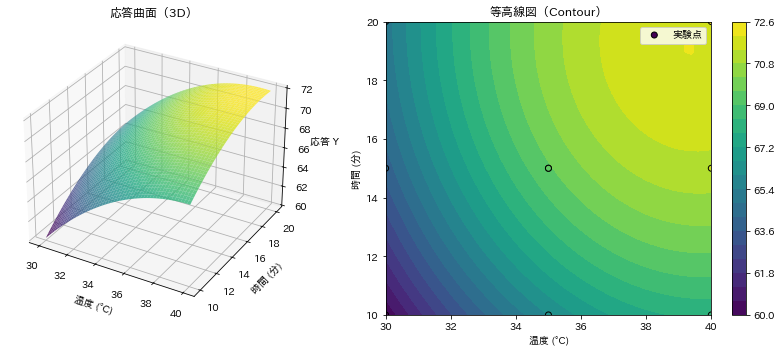

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import japanize_matplotlib

# --- データ作成（例：温度と時間が因子、応答Y） ---
# 温度（x1）と時間（x2）を2水準ずつ試す
x1 = np.array([30, 30, 40, 40, 35, 35, 30, 40, 35])
x2 = np.array([10, 20, 10, 20, 15, 15, 15, 15, 10])
Y = np.array([60, 65, 68, 72, 70, 69, 64, 71, 66])  # 応答

X = np.column_stack((x1, x2))

# --- 2次モデルに変換（線形項, 交互作用, 2乗項） ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# --- 回帰モデルのあてはめ ---
model = LinearRegression()
model.fit(X_poly, Y)

# --- グリッド上で予測 ---
x1_range = np.linspace(30, 40, 50)
x2_range = np.linspace(10, 20, 50)
x1g, x2g = np.meshgrid(x1_range, x2_range)
X_pred = np.column_stack((x1g.ravel(), x2g.ravel()))
X_pred_poly = poly.transform(X_pred)
Y_pred = model.predict(X_pred_poly).reshape(x1g.shape)

# --- 3Dプロット ---
fig = plt.figure(figsize=(12, 5))

# 曲面プロット
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x1g, x2g, Y_pred, cmap='viridis', alpha=0.8)
ax.set_xlabel("温度 (°C)")
ax.set_ylabel("時間 (分)")
ax.set_zlabel("応答 Y")
ax.set_title("応答曲面（3D）")

# 等高線プロット
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(x1g, x2g, Y_pred, cmap='viridis', levels=20)
fig.colorbar(contour, ax=ax2)
ax2.scatter(x1, x2, c=Y, edgecolors='k', label='実験点')
ax2.set_xlabel("温度 (°C)")
ax2.set_ylabel("時間 (分)")
ax2.set_title("等高線図（Contour）")
ax2.legend()

plt.tight_layout()
plt.show()


### 2. Polinomios ortogonales
直交多項式

En experimentos de diseño unifactorial, cuando el factor considerado es un factor cuantitativo, las distancias entre los niveles son iguales y el número de repeticiones de cada nivel es el mismo, se puede descomoponer y analizar la variablilidad de ese factor utilizando **polinomios ortogonales**（直交多項式）.

[Audio_14]()

## Por favor, responda a las preguntas del examen de práctica a través del siguiente enlace.


[Simulacro de examen](https://forms.gle/xpbpLS6XYwefQShr8)

## 12.1

L8直交配列表を用いた実験の結果、表12.1のデータを得た。

Resultado del experimento utilizando la tabla de diseño ortogonal L18.


In [ ]:
# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU"
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet5") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.astype(int)

data = df.to_dict(orient="list")

# Mostrar los datos
print("Tabla 12.1 Tabla de diseño ortogonal L8 y resultados del experimento")
df

Tabla 12.1 Tabla de diseño ortogonal L8 y resultados del experimento


,Factor_A,Factor_B,AxB,AxC,Factor_C,Residual,Factor_D,Data
1,1,1,1,1,1,1,1,50
2,1,1,1,2,2,2,2,16
3,1,2,2,1,1,2,2,24
4,1,2,2,2,2,1,1,46
5,2,1,2,2,1,1,2,66
6,2,1,2,1,2,2,1,88
7,2,2,1,2,1,2,1,52
8,2,2,1,1,2,1,2,34


1. Calcular la suma de cuadrados de los efectos principales y las interacciones.

In [ ]:
# 因子のリスト
factors = ['Factor_A', 'Factor_B', 'AxB', 'AxC', 'Factor_C', 'Residual', 'Factor_D']

# 水準ごとの合計を DataFrame にまとめる
level_sums = {}
for factor in factors:
    level_sums[factor] = df.groupby(factor)['Data'].sum()

level_sums_df = pd.DataFrame(level_sums).T.fillna(0).astype(int)
level_sums_df.columns.name = "Level"
level_sums_df.index.name = "Factor"

# 平方和（SS）の計算
grand_mean = df['Data'].mean()
ss_list = []
for factor in factors:
    means = df.groupby(factor)['Data'].mean()
    counts = df[factor].value_counts().sort_index()
    ss = sum(counts[i] * (means[i] - grand_mean) ** 2 for i in means.index)
    ss_list.append({'Factor': factor, 'SS': round(ss, 2)})

ss_df = pd.DataFrame(ss_list).set_index('Factor')

# 結果の表示
print("◆ Suma total de cada nivel de cada factor")
display(level_sums_df.T)

print("\n◆ Suma de cuadrados de cada factor（SS）")
display(ss_df.T)


◆ Suma total de cada nivel de cada factor


Factor,Factor_A,Factor_B,AxB,AxC,Factor_C,Residual,Factor_D
Level,,,,,,,
1,136,220,152,196,192,196,236
2,240,156,224,180,184,180,140



◆ Suma de cuadrados de cada factor（SS）


Factor,Factor_A,Factor_B,AxB,AxC,Factor_C,Residual,Factor_D
SS,1352.0,512.0,648.0,32.0,8.0,32.0,1152.0


Creación de la tabla de análisis de varianza (tabla ANOVA)

In [ ]:
df0 = df.rename(columns={'Data':'y'})
df0 = df0.drop(columns="Residual")

anova = Anova11(df0, p=0)
anova_table, message = anova.creacion_ANOVA11()


【手動による分散分析表】
          sum_sq  df  mean_sq      F    PR(>F)
Factor                                        
Factor_A  1352.0   1   1352.0  42.25  0.097180
Factor_B   512.0   1    512.0  16.00  0.155958
AxB        648.0   1    648.0  20.25  0.139209
AxC         32.0   1     32.0   1.00  0.500000
Factor_C     8.0   1      8.0   0.25  0.704833
Factor_D  1152.0   1   1152.0  36.00  0.105137
Residual    32.0   1     32.0    NaN       NaN


2. 分散分析の結果、主効果Cおよび交互作用AxCは、有意ではなく、分散比も小さいので、これらを誤差にプールした分散分析表を作成せよ。

2. Como resultado del análisis de varianza, los efectos principales C y la interacción AxC no son significativos, y como la relación de varianza es pequeña, se debe crear una tabla de análisis de varianza donde se agrupan en el error.

In [ ]:
anova_table = Pooling.pool(anova_table, ['Factor_C', 'AxC'], 'Residual')
anova_table

,sum_sq,df,F,PR(>F),mean_sq
Factor,,,,,
Factor_A,1352.0,1.0,56.333333,0.004901,1352.0
Factor_B,512.0,1.0,21.333333,0.019101,512.0
AxB,648.0,1.0,27.000000,0.013847,648.0
Factor_D,1152.0,1.0,48.000000,0.006165,1152.0
Residual,72.0,3.0,1.000000,0.500000,24.0


3. 分散分析の結果、データの構造式は：

3. Como resultado del análisis de varianza, la fómula estructural de los deatos es:

* $ x = \mu + a + b + d + (ab) + \epsilon $

4. データの総和を $ T $、因子 $ X $ の $ i $ 水準でのデータの和を $ T(X_i) $、因子 $ X $, $ Y $ の $ i $ 水準、 $ j $ 水準の組み合わせでのデータの和を $ T(X_iY_j) $ と表記した時、因子 $ A,B,D $ の水準組み合わせの母平均 $ \hat{\mu}(A_i B_j D_k) $ を推定する。

4. Cuando la suma total de los datos se denota por  $ T $, la suma de los datos en el nivel $ i $ del factor  $ X $ se denota por $ T(X_i) $, y la suma de los datos en la combinación de los niveles  $ i $ del factor $ X $ y  $ j $ del factor  $ Y $ se denota por $ T(X_iY_j) $, se estima la media poblacional $ \hat{\mu}(A_i B_j D_k) $ para la combinación de niveles de los factores $ A,B,D $.

* $ \hat{\mu}(A_i B_j D_k) = \hat{\mu + a_i + b_j + d_k +(ab)_{ij}} = \hat{\mu + a_i + b_j + (ab)_{ij}} + \hat{\mu + d_k} - \hat{\mu} $

* $ \hat{\mu}(A_i B_j D_k)  = \frac{T(A_iB_j)}{2} + \frac{T(D_k)}{4} - \frac{T}{8} $

In [ ]:
from anova_utils import Optim # type: ignore
# 
factores = ['Factor_A', 'Factor_B', 'Factor_D']

# Determinar la combinación de los niveles óptimos
niveles_optimos = Optim.obtener_niveles_optimos(df0, factores)
print("✅ 各因子の最適水準:")
for f, n in niveles_optimos.items():
    print(f"Factor {f}: nivel {n}")


✅ 各因子の最適水準:
Factor Factor_A: nivel 2
Factor Factor_B: nivel 1
Factor Factor_D: nivel 1


下記はPolarsのDataFrameを使って手動で計算を行った結果です。

In [ ]:
import polars as pl

# Crear un DataFrame con Polars
df2 = pl.DataFrame(data)

# Mostrar los datos
print("Tabla 12.1 Tabla de diseño ortogonal L8 y resultados del experimento")
display(df2)

Tabla 12.1 Tabla de diseño ortogonal L8 y resultados del experimento


Factor_A,Factor_B,AxB,AxC,Factor_C,Residual,Factor_D,Data
i64,i64,i64,i64,i64,i64,i64,i64
1,1,1,1,1,1,1,50
1,1,1,2,2,2,2,16
1,2,2,1,1,2,2,24
1,2,2,2,2,1,1,46
2,1,2,2,1,1,2,66
2,1,2,1,2,2,1,88
2,2,1,2,1,2,1,52
2,2,1,1,2,1,2,34


In [ ]:
def calc_ss(df: pl.DataFrame, factor: str, data_col: str, total_mean: float) -> float:
    """
    Función para calcular la suma de los cuadrados en el factor especificado.
    """
    # Estadísticas de un grupo
    df_grp1 = df.filter(pl.col(factor) == 1)
    mean_1 = df_grp1.select(pl.col(data_col).mean()).item()
    n1 = df_grp1.height

    # Estadísticas de dos grupos
    df_grp2 = df.filter(pl.col(factor) == 2)
    mean_2 = df_grp2.select(pl.col(data_col).mean()).item()
    n2 = df_grp2.height

    # Cálculo de la suma de los cuadrados
    ss = n1 * ((mean_1 - total_mean) ** 2) + n2 * ((mean_2 - total_mean) ** 2)
    return ss

# Suma total de los cuadrados (Total Sum of Squares)
total_mean = df['Data'].mean()
total_ss = sum((df['Data'] - total_mean) ** 2)

# Calcular la suma de los cuadrados de cada factor
ss_A = calc_ss(df2, "Factor_A", "Data", total_mean)
ss_B = calc_ss(df2, "Factor_B", "Data", total_mean)
ss_C = calc_ss(df2, "Factor_C", "Data", total_mean)
ss_D = calc_ss(df2, "Factor_D", "Data", total_mean)

# Suma de los cuadrados de los residuos
ss_AxB = calc_ss(df2, "AxB", "Data", total_mean)
ss_AxC = calc_ss(df2, "AxC", "Data", total_mean)

# Suma de los cuadrados de los residuos (Residual Sum of Squares)
ss_residual = total_ss - (ss_A + ss_B + ss_C + ss_D + ss_AxB + ss_AxC)

print("Suma de los cuadrados del factor A:", ss_A)
print("Suma de los cuadrados de AxB:", ss_AxB)

Suma de los cuadrados del fator A: 1352.0
Suma de los cuadrados de AxB: 648.0


### Creación de la tabla de análisis de varianza (tabla ANOVA)

In [ ]:
# Grados de libertad (df) de cada término
df_A   = 2 - 1
df_B   = 2 - 1
df_C   = 2 - 1
df_D   = 2 - 1
df_AxB = 2 - 1
df_AxC = 2 - 1

# Los grados de libertad de los residuos se calculan restando la suma de
# los niveles de cada efecto del total de datos
n_total = df2.height
df_total = n_total - 1
df_model = df_A + df_B + df_C + df_D + df_AxB + df_AxC
df_residual = df_total - df_model

# Cálculo del cuadrado medio (Mean Square: MS)
ms_A   = ss_A   / df_A
ms_B   = ss_B   / df_B
ms_C   = ss_C   / df_C
ms_D   = ss_D   / df_D
ms_AxB = ss_AxB / df_AxB
ms_AxC = ss_AxC / df_AxC
ms_residual = ss_residual / df_residual

# Cálculo del valor F (dividiendo el MS de cada efecto por el MS de los residuos)
F_A   = ms_A   / ms_residual
F_B   = ms_B   / ms_residual
F_C   = ms_C   / ms_residual
F_D   = ms_D   / ms_residual
F_AxB = ms_AxB / ms_residual
F_AxC = ms_AxC / ms_residual

# Tabla ANOVA
anova_table = pl.DataFrame({
    "Source": ["Factor_A", "Factor_B", "Factor_C", "Factor_D", "AxB", "AxC", "Residual", "Total"],
    "sum_sq":      [ss_A, ss_B, ss_C, ss_D, ss_AxB, ss_AxC, ss_residual, total_ss],
    "df":      [df_A, df_B, df_C, df_D, df_AxB, df_AxC, df_residual, df_total],
    "mean-sq":      [ms_A, ms_B, ms_C, ms_D, ms_AxB, ms_AxC, ms_residual, None],
    "F":       [F_A, F_B, F_C, F_D, F_AxB, F_AxC, None, None]
})

display(anova_table)

Source,sum_sq,df,mean-sq,F
str,f64,i64,f64,f64
"""Factor_A""",1352.0,1,1352.0,42.25
"""Factor_B""",512.0,1,512.0,16.0
"""Factor_C""",8.0,1,8.0,0.25
"""Factor_D""",1152.0,1,1152.0,36.0
"""AxB""",648.0,1,648.0,20.25
"""AxC""",32.0,1,32.0,1.0
"""Residual""",32.0,1,32.0,null
"""Total""",3736.0,7,null,null


2. 分散分析の結果、主効果Cおよび交互作用AxCは、有意ではなく、分散比も小さいので、これらを誤差にプールした分散分析表を作成せよ。

2. Como resultado del análisis de varianza, los efectos principales C y la interacción AxC no son significativos, y como la relación de varianza es pequeña, se debe crear una tabla de análisis de varianza donde se agrupan en el error.

In [ ]:
# --- Tratamiento de agrupamiento ---
# Agrupa los efectos del factor C y AxC en el error
ss_residual_pool = ss_residual + ss_C + ss_AxC
df_residual_pool = df_residual + df_C + df_AxC

# --- Cálculo del cuadrado medio (MS) de los residuos ---
ms_residual_pool = ss_residual_pool / df_residual_pool

# --- Cálculo del valor F ---
F_A   = np.round(ms_A   / ms_residual_pool,2)
F_B   = np.round(ms_B   / ms_residual_pool,2)
F_D   = np.round(ms_D   / ms_residual_pool,2)
F_AxB = np.round(ms_AxB / ms_residual_pool,2)

# --- Creación de la tabla de análisis de varianza (ANOVA table)  ---
anova_table = pl.DataFrame({
    "Source": ["Factor_A", "Factor_B", "Factor_D", "AxB", "Residual (Pooled)", "Total"],
    "sum_sq":      [ss_A, ss_B, ss_D, ss_AxB, ss_residual_pool, total_ss],
    "df":      [df_A, df_B, df_D, df_AxB, df_residual_pool, df_total],
    "mean_sq":      [ms_A, ms_B, ms_D, ms_AxB, ms_residual_pool, None],
    "F":       [F_A, F_B, F_D, F_AxB, None, None]
})

display(anova_table)

Source,sum_sq,df,mean_sq,F
str,f64,i64,f64,f64
"""Factor_A""",1352.0,1,1352.0,56.33
"""Factor_B""",512.0,1,512.0,21.33
"""Factor_D""",1152.0,1,1152.0,48.0
"""AxB""",648.0,1,648.0,27.0
"""Residual (Pooled)""",72.0,3,24.0,null
"""Total""",3736.0,7,null,null


3. 分散分析の結果、データの構造式は：

3. Como resultado del análisis de varianza, la fómula estructural de los deatos es:

* $ x = \mu + a + b + d + (ab) + \epsilon $

4. データの総和を $ T $、因子 $ X $ の $ i $ 水準でのデータの和を $ T(X_i) $、因子 $ X $, $ Y $ の $ i $ 水準、 $ j $ 水準の組み合わせでのデータの和を $ T(X_iY_j) $ と表記した時、因子 $ A,B,D $ の水準組み合わせの母平均 $ \hat{\mu}(A_i B_j D_k) $ を推定する。

4. Cuando la suma total de los datos se denota por  $ T $, la suma de los datos en el nivel $ i $ del factor  $ X $ se denota por $ T(X_i) $, y la suma de los datos en la combinación de los niveles  $ i $ del factor $ X $ y  $ j $ del factor  $ Y $ se denota por $ T(X_iY_j) $, se estima la media poblacional $ \hat{\mu}(A_i B_j D_k) $ para la combinación de niveles de los factores $ A,B,D $.

* $ \hat{\mu}(A_i B_j D_k) = \hat{\mu + a_i + b_j + d_k +(ab)_{ij}} = \hat{\mu + a_i + b_j + (ab)_{ij}} + \hat{\mu + d_k} - \hat{\mu} $

* $ \hat{\mu}(A_i B_j D_k)  = \frac{T(A_iB_j)}{2} + \frac{T(D_k)}{4} - \frac{T}{8} $

5. 回帰モデル型分散分析により分散分析表を作成する

5. Crear una tabla de análisis de varianza mediante análisis de varianza de modelo de regresión

In [ ]:
df3 = df2.drop(['AxB','AxC','Residual'])
display(df3)

Factor_A,Factor_B,Factor_C,Factor_D,Data
i64,i64,i64,i64,i64
1,1,1,1,50
1,1,2,2,16
1,2,1,2,24
1,2,2,1,46
2,1,1,2,66
2,1,2,1,88
2,2,1,1,52
2,2,2,2,34


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = df3.to_pandas()

def convertir_a_categoricas(data, columnas):
    for columna in columnas:
        data[columna] = data[columna].astype('category')
    return data

columnas_a_convertir = ['Factor_A', 'Factor_B', 'Factor_C', 'Factor_D']
df = convertir_a_categoricas(df, columnas_a_convertir)

# Definir el modelo de análisis de varianza incluyendo las interacciones AxB y AxC
model = smf.ols('Data ~ Factor_A * Factor_B + Factor_A * Factor_C + Factor_D', data=df).fit()

# Crear la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                   sum_sq   df      F    PR(>F)
Factor_A           1352.0  1.0  42.25  0.097180
Factor_B            512.0  1.0  16.00  0.155958
Factor_C              8.0  1.0   0.25  0.704833
Factor_D           1152.0  1.0  36.00  0.105137
Factor_A:Factor_B   648.0  1.0  20.25  0.139209
Factor_A:Factor_C    32.0  1.0   1.00  0.500000
Residual             32.0  1.0    NaN       NaN


In [ ]:
# Agrupar los factores no significativos
# (integrar en el error aquellos con una razón de varianza pequeña)
insignificant_factors = anova_table[anova_table['PR(>F)'] > 0.25].index.tolist()
formula_reduced = 'Data ~ ' + ' + '.join([factor for factor in ['Factor_A', 'Factor_B', 'Factor_C', 'Factor_D', 'Factor_A:Factor_B', 'Factor_A:Factor_C'] if factor not in insignificant_factors])

# Realizar nuevamente el análisis de varianza con un modelo simplificado
model_reduced = smf.ols(formula_reduced, data=df).fit()
anova_table_reduced = sm.stats.anova_lm(model_reduced, typ=2)
print("Reduced ANOVA Table:")
print(anova_table_reduced)


Reduced ANOVA Table:
                   sum_sq   df          F    PR(>F)
Factor_A           1352.0  1.0  56.333333  0.004901
Factor_B            512.0  1.0  21.333333  0.019101
Factor_D           1152.0  1.0  48.000000  0.006165
Factor_A:Factor_B   648.0  1.0  27.000000  0.013847
Residual             72.0  3.0        NaN       NaN


## 12.2

実験内容

ある工程では、ロットで運び込まれる原料を、熱処理を行って、製品を製造している。
熱処理においては、温度と圧力が管理されている。
この度、製品の収率を上げるため、これらの条件を検討することになった。
収率は、原料ロットの特性の変動に影響を受けるため、原料の４ロット（L1, L2, L3, L4）をランダムに選び、各ロットの原料について、温度A（A1, A2の2水準）、圧力B（B, B2の３水準）の条件で、製品を試作し、収率x_ijk（i:Aの水準、j:Ｂの水準番号、k:ロットの水準番号）を測定した。


En un proceso, la materia prima que se trae en los lotes se somete a tratamiento térmico para fabricar productos.
En el tratamiento térmico, la temperatura y la presión se controlan.
Hemos decidido revisar estas condiciones para aumentar el rendimiento del producto.
Dado que el rendimiento se ve afectado por las fluctuaciones en las características de los lotes de materia prima, seleccionamos aleatoriamente cuatro lotes de materia prima (L1, L2, L3, L4). Para cada lote de materia prima, fabricamos productos de prueba bajo las condiciones de temperatura A (Dos niveles: A1, A2) y presión B (tres niveles: B1, B2, B3), y medimos el rendimiento $ x_{ijk} $ (donde i es el nivel de A, j es el número de nivele de B, y k es el número de nivel de lote).

行われた実験は、ロットLを変量因子、温度A、圧力Bを母数因子とした乱塊法の実験である。

母数因子は、水準を指定することでその効果が再現できる因子であり、各水準の効果を合計すると０になる。

変量因子は、水準を指定してもその効果に再現性がなく、また指定することに意味の無い因子である。
従って、変量因子と母数因子の交互作用の平方和は、誤差の平方和として取り扱われる。


El experimento realizado es un **diseño de bloques aleatorios** con el lote L como factor aleatorio y la temperatura A y la presión B como **factores de parámetros**.

Un factor de parámetro es un factor cuyo efecto se puede reproducir especificando su nivel, y la suma de los efectos de cada nivel es cero.

Un factor aleatorio es un factor cuyo efecto no es reproducible, incluso si se especifica el nivel, y especificarlo no tiene sentido.
Por lo tanto, la suma de cuadrados de la interacción entre el factor aleatorio y el factor de parámetro se trata como la suma de cuadrados del error.


データの構造式には、変量因子と母数因子の交互作用に相当する項は現れない。

En la fórmula del modelo de datos, no aparece ningún término correspondiente a la interacción entre factores aleatorios y factores fijos.

$ x_{jik} = \mu + l_k + a_i + b_j + (ab)_{ij} + \epsilon_{ijk} $

ロットの効果は、実験に得ればれていたロットが有していた効果であり、再度実験するとき、他のロットが選ばれると、ロットの水準の効果は異なったものになる。そのため、ロットの効果については、効果の大きさには関心が払われず、ばらつきに関心が払われる。

El efecto del lote corresponde al efecto que tenían los lotes utilizados en el experimento. Si se repite el experimento con otros lotes, los niveles del efecto del lote serán diferentes. Por eso, no se presta atención al tamaño del efecto del lote, sino a su variabilidad.

$ l_k \sim N(0, \sigma_L^2) $

## 12.3

因子A（３水準）因子B（２水準）を表12.3のL8直交配列表に割り付け、No1～No8の実験をランダムな順序で行った。表12.3の実験結果を得た。

なお、列 a, bの水準と因子Aの水準設定は、表12.4のように行った。

下記を求めよ。
1. 因子Aの平方和と自由度
2. 因子Bの平方和と自由度
3. 交互作用AxBの平方和と自由度
4. 誤差の平方和と自由度


Se asignaron el factor A (con 3 niveles) y el factor B (con 2 niveles) a la matriz ortogonal L8 de la Tabla 12.3 y los experimentos No1 a No8 se realizaron en un orden aleatorio. Se obtuvieron los resultados experimentales de la Tabla 12.3.

Cabe destacar que los niveles de las columnas a y b y la configuración de los niveles del factor A se establecieron según la Tabla 12.4.

Determinar lo siguiente:
1. La suma de cuadrados y los grados de libertade del factor A.
2. La suma de cuadrados y los grados de libertad del factor B.
3. La sumade cuadrados y los grados de libertad de la interacción AxB.
4. La suma de cuadrados y los grados de libertad del residuo.

In [ ]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet8-1") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df.iloc[:-1,:] = df.iloc[:-1,:].astype(int)
df0 = df.copy()

display(df0)


,P1,P2,P1P2,B,P1B,P2B,P1P2B,x
1,1,1,1,1,1,1,1,6
2,1,1,1,2,2,2,2,7
3,1,2,2,1,1,2,2,2
4,1,2,2,2,2,1,1,5
5,2,1,2,1,2,1,2,7
6,2,1,2,2,1,2,1,8
7,2,2,1,1,2,2,1,9
8,2,2,1,2,1,1,2,8
9,a,b,ab,c,ac,bc,abc,x


In [ ]:
df.columns = df.iloc[-1].to_list()
df = df.iloc[:-1,:]

# Configuración del Factor A y B
df = df.rename(columns={'c': 'Factor_B'})

def assign_factor_a(row):
    if row['a'] == 1 and row['b'] in [1, 2]:
        return 1
    elif row['a'] == 2 and row['b'] == 1:
        return 2
    elif row['a'] == 2 and row['b'] == 2:
        return 3

df['Factor_A'] = df.apply(assign_factor_a, axis=1)

print("Tabla 12.4 Configuración de los niveles del factor A")
df[['a','b','Factor_A','Factor_B']]

Tabla 12.4 Configuración de los niveles del factor A


,a,b,Factor_A,Factor_B
1,1,1,1,1
2,1,1,1,2
3,1,2,1,1
4,1,2,1,2
5,2,1,2,1
6,2,1,2,2
7,2,2,3,1
8,2,2,3,2


In [ ]:
def convertir_a_categoricas(data, columnas):
    for columna in columnas:
        data[columna] = data[columna].astype('category')
    return data

# Creación de datos
data_dict = df.to_dict(orient="list")

# Conversión a un DataFrame
data = pd.DataFrame(data_dict)

# Conversión de los factores A y B en variables categóricas
columnas_a_convertir = ['Factor_A', 'Factor_B']
data = convertir_a_categoricas(data, columnas_a_convertir)

# Definición del modelo de análisis de varianza
model = ols('x ~ Factor_A + Factor_B + Factor_A:Factor_B', data=data).fit()

# Tabla de análisis de varianza (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)

# Visualización de resultados
print("Tabla de análisis de varianza (AVOVA):")
print(anova_table)

# Obtención de las suma de cuadrados
ssq_A = anova_table['sum_sq']['Factor_A']
ssq_B = anova_table['sum_sq']['Factor_B']
ssq_AB = anova_table['sum_sq']['Factor_A:Factor_B']
error = anova_table['sum_sq']['Residual']

# Obtención de los grados de libertad
df_A = anova_table['df']['Factor_A']
df_B = anova_table['df']['Factor_B']
df_AB = anova_table['df']['Factor_A:Factor_B']
df_error = anova_table['df']['Residual']


print(f"\nSuma de cuadrados del factor A: {ssq_A:.0f}  Grados de cuadrados del factor A： {df_A}")
print(f"Suma de cuadrados del factor A: {ssq_B:.0f}     Grados de cuadrados del factor B:  {df_B}")
print(f"Suma de cuadrados de la interacción AxB: {ssq_AB:.0f}   Grados de libertad de la interacción AxB:  {df_AB}")
print(f"Suma de cuadrados del residuo: {error:.0f}   Grados de libertad del residuo:  {df_error}")


Tabla de análisis de varianza (AVOVA):
                   sum_sq   df    F    PR(>F)
Factor_A             19.0  2.0  1.9  0.344828
Factor_B              2.0  1.0  0.4  0.591752
Factor_A:Factor_B     3.0  2.0  0.3  0.769231
Residual             10.0  2.0  NaN       NaN

Suma de cuadrados del factor A: 19  Grados de cuadrados del factor A： 2.0
Suma de cuadrados del factor A: 2     Grados de cuadrados del factor B:  1.0
Suma de cuadrados de la interacción AxB: 3   Grados de libertad de la interacción AxB:  2.0
Suma de cuadrados del residuo: 10   Grados de libertad del residuo:  2.0


## 12.6

因子A（３水準）を一次因子、因子B（２水準）、因子C（３水準）とした反復（R）２回の２段分割実験を行い、表１２．７のデータを得た。
1. 交互作用AxCの平方和 $ S_{A \times C} $
2. 一次誤差の平方和、自由度
3. ２次誤差の平方和、自由度
4. ３次誤差の平方和、自由度

を求めよ。

Se realizó un experimento de división en dos etapas con dos repeticiones (R), donde el factor A (3 niveles) se consideró como el factor primero, y los factor  B (2 niveles) y C (3 niveles) se incluyeron en la estructura experimental. Como resultado, se obtuvieron los datos de la Tabla 12.7.

Calcule los siguientes valores:
1. La suma de cuadrados de la interacción $ S_{A \times C} $
2. La suma de cuadrados y los grados de libertad del erro de primer nivel.
3. La suma de cuadrados y los grados de libertad del error de segundo nivel.
4. La suma de cuadrados y los grados de libertad de error de tercer nivel.

In [ ]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet9") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df['y'] = df['y'].astype(int)

df0 = df.copy()

# Crear una tabla dinámica
df_pivot = df.pivot(index=['R', 'A', 'B'], columns='C', values='y')
# Modificar los nombres de las columnas según corresponda
df_pivot.columns = [f'C{col}' for col in df_pivot.columns]

print("Tabla 12.7 Resultados experimentales")
print(df_pivot.reset_index())

Tabla 12.7 Resultados experimentales
    R  A  B  C1  C2  C3
0   1  1  1   7  11  11
1   1  1  2   8  20  29
2   1  2  1  13  21  21
3   1  2  2  17  26  26
4   1  3  1  21  31  25
5   1  3  2  30  33  21
6   2  1  1  14  20  22
7   2  1  2  10  18  22
8   2  2  1  20  20  26
9   2  2  2  24  31  33
10  2  3  1  21  26  18
11  2  3  2  28  28  22


In [ ]:
# Restaurar la tabla dinámica a su form original
df_unpivot = df_pivot.reset_index().melt(id_vars=['R', 'A', 'B'], var_name='C', value_name='y')
df_unpivot['C'] = df_unpivot['C'].str.extract(r'C(\d+)').astype(int)

In [ ]:
# Creación de datos
data_dict = df.to_dict(orient="list")

# Conversión a un DataFrame
data = pd.DataFrame(data_dict)

# Conversión de los factores A y B en variables categóricas
def convertir_a_categoricos(data, columns):
  for col in columns:
    data[col] = data[col].astype('category')
  return data

columnas_a_convertir = ['A', 'B', 'C', 'R']
data = convertir_a_categoricos(data, columnas_a_convertir)

# Definición del modelo de análisis de varianza
model = ols('y ~ R + A + R:A + B  + R:B + R:A:B + C + A:B:C + A:C + R:C + R:A:C + R:B:C ', data=data).fit()

# Tabla de análisis de varianza (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)

# Visualización de resultados
print("Tabla de análisis de varianza (AVOVA):")
print(anova_table)

Tabla de análisis de varianza (AVOVA):
              sum_sq   df          F    PR(>F)
R          28.444444  1.0   2.884507  0.164667
A         572.666667  2.0  29.036620  0.004153
B         169.000000  1.0  17.138028  0.014379
C         256.500000  2.0  13.005634  0.017764
R:A       106.888889  2.0   5.419718  0.072658
R:B        11.111111  1.0   1.126761  0.348306
A:C       273.333333  4.0   6.929577  0.043700
R:C        16.722222  2.0   0.847887  0.493190
R:A:B     139.055556  4.0   3.525352  0.124912
A:B:C      96.444444  6.0   1.630047  0.331180
R:A:C       8.444444  4.0   0.214085  0.917685
R:B:C       0.388889  2.0   0.019718  0.980570
Residual   39.444444  4.0        NaN       NaN


反復R、因子A、B、Cの効果を $ r, a, b, c $、一次誤差、２次誤差、３次誤差を $ \epsilon (1), \epsilon(2), \epsilon(3) $ とした場合、実験をあらわすデータの構造式：

Si denotamos la repetición como $ R $, los factores como $ A, B, C $, y los errores como $ \epsilon (1), \epsilon(2), \epsilon(3) $, entonces la estructura del modelo experimental se expresa como:

$ x_{ijkl} = \mu + r_l + a_i + \epsilon(1)_{il} + b_j + (ab)_{ij} + \epsilon(2)_{ijl} + c_k + (ac)_{ik} + (bc)_{jk} + (abc)_{ijk} + \epsilon(3)_{ijkl} $



In [ ]:
# Error de primer nivel
ss1 = anova_table.loc['R:A', 'sum_sq']
df1 = anova_table.loc['R:A', 'df']

# Error de segundo nivel
ss2 = (anova_table.loc['R:A:B', 'sum_sq'] +
       anova_table.loc['R:B', 'sum_sq'])
df2 =   (anova_table.loc['R:A:B', 'df'] +
       anova_table.loc['R:B', 'df'])

# Error de tercer nivel
ss3 = (anova_table.loc['R:C', 'sum_sq'] +
      anova_table.loc['R:A:C', 'sum_sq'] +
      anova_table.loc['R:B:C', 'sum_sq'] +
      anova_table.loc['Residual', 'sum_sq'])
df3 = (anova_table.loc['R:C', 'df'] +
      anova_table.loc['R:A:C', 'df'] +
      anova_table.loc['R:B:C', 'df'] +
      anova_table.loc['Residual', 'df'])

print(f'Error de primer nivel (A×R): {ss1:.0f}', df1)
print(f'Error de segundo nivel (B×R+AxBxR): {ss2:.0f}', df2)
print(f'Error de tercer nivel (CxR+AxCxR+BxCxR+AxBxCxR): {ss3:.0f}', df3)


Error de primer nivel (A×R): 107 2.0
Error de segundo nivel (B×R+AxBxR): 150 5.0
Error de tercer nivel (CxR+AxCxR+BxCxR+AxBxCxR): 65 12.0


## 12.7

原料を一次処理して、一次中間体Pを製造し、Pを２次処理して２次中間体Qを製造し、Qを３次処理して製品を製造する工程がある。一次処理には因子Aが、２次処理には因子B、Cが、３次処理には因子D、Fが影響を及ぼすと考えられる。この度、これらの因子の製品の特性への影響を検討するため、以下の実験を行った。

因子Aを一次因子、因子B,Cを２次因子、因子D,Fを３次因子として、表１２．８のようにL18直交配列表に割り付けた。一次誤差を一次因子と交絡させないための実験を行う手順を決める。

Si tiene un proceso en el que la materia a un tratamiento primario para producir un intermedio primario P, luego P se somete a un tratamiento secundario para obtener un intermedio secundario Q, y finalmente Q se somete a un tratamiento terciario para fabricar el producto final. Se considera que el tratamiento primario está influenciado por el factor A, el tratamiento secundario por los factores B y C, y el tratamiento terciario por los factores D y F. Con el fin de evaluar la influencia de estos factores en las características del producto, se llevó a cabo el siguiente experimento.

Se asignaron el factor A como factor de primer nivel, los factores B y C como factores de segundo nivel, y los factores D y F como factores de tercer nivel en la tabla ortogonal L18, como se muestra en la Tabla 12.8. Se determinará el procedimiento experimental para evitar que el error de primer nivel se confunda con el factor de primer nivel.


In [ ]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet14-1") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.set_index('Factor')

df0 = df.copy()

df0

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Factor,,,,,,,,,,,,,,,
0,A,,BxC,B,,DxF,C,,,D,CxF,F,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2
3,1,1,1,2,2,2,2,1,1,1,1,2,2,2,2
4,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1
5,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2
6,1,2,2,1,1,2,2,2,2,1,1,2,2,1,1
7,1,2,2,2,2,1,1,1,1,2,2,2,2,1,1
8,1,2,2,2,2,1,1,2,2,1,1,1,1,2,2


## 実験の順番

1. 一次誤差を一次因子Aと交絡させないためには、一次因子Aの水準が均等に分布するように実験グループを選ぶ必要がある。
2. 因子B、Cの水準が均等に分配されるように設計する必要がある。
3. ３次因子D,Fの水準の均等性を考量する。


最終的な実験順番
1. 一次処理（Pの製造）：(1,2)(3,4)(5,6)(7,8)(9,10)(11,12)(13,14)(15,16)
2. 二次処理（Qの製造）：(3,4)(5,6)(7,8)(9,10)
3.３次処理（製品の製造）：(11,12)(13,14)(15,16)


## Orden de los experimentos

1. Para evitar que el error de primer orden se confunda con el factor A, es necesario elegir grupos experimentales de manera que los niveles del factor A se distribuyan uniformemente.
2. Es necesario diseñar el experimento de manera de los niveles de los factores B y C se distribuyan de manera uniforme.
3. Se debe considerar la igualidad de los niveles de los factores de tercer orden D y F.

Orden final de los experimentos:
1. Primer tratamiento (fabricación de P): (1,2)(3,4)(5,6)(7,8)(9,10)(11,12)(13,14)(15,16)
2. Segundo tratamiento (fabricación de P): (3,4)(5,6)(7,8)(9,10)
3. Tercer tratamiento (fabricación del producto): (11,12)(13,14)(15,16)

## 12.8

因子A（２水準）を一次因子、因子B（３水準）を２次因子とした分割実験を反復R（２回）実施して、表12.9のデータを得た。

1. 因子Aの分散比
2. 一次誤差（RxA）の自由度、分散比
3. 因子Bの分散比

を求めよ。

Se realizó un experimento factorial con el factor A (2 niveles) como factor principal y el factor B (3 niveles) como factor secundario, con repetición R (2 veces), obteniendo los datos de la tabla 12.9.

Calcule lo siguiente:
1. Razón de varianza del factor A
2. Grados de libertad del erro primario (RxA), razón de varianza.
3. Razón de varianza del factor B

In [ ]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet10") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df[['R','A','B']] = df[['R','A','B']].astype('category')
df['x'] = df['x'].astype(float)

print("Tabla 12.9 Resultados experimentales")
df

Tabla 12.9 Resultados experimentales


,R,A,B,x
1,1,1,1,16.0
2,1,1,2,40.0
3,1,1,3,16.0
4,1,2,1,8.0
5,1,2,2,26.0
6,1,2,3,8.0
7,2,1,1,32.0
8,2,1,2,44.0
9,2,1,3,34.0
10,2,2,1,4.0


In [ ]:
# Definición del modelo de análisis de varianza
model = ols('x ~ R + A + R:A + B + A:B', data=df).fit()

# Tabla de análisis de varianza (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
R,1.0,21.333333,21.333333,0.744186,0.436975
A,1.0,1200.000000,1200.000000,41.860465,0.002940
B,2.0,562.666667,281.333333,9.813953,0.028660
R:A,1.0,300.000000,300.000000,10.465116,0.031825
A:B,2.0,24.000000,12.000000,0.418605,0.683802
Residual,4.0,114.666667,28.666667,NaN,NaN


In [ ]:
anova_table = Pooling.pool(anova_table, ['R'], 'R:A')
anova_table = Pooling.pool(anova_table, ['A:B'], 'Residual')
anova_table

,sum_sq,df,F,PR(>F),mean_sq
A,1200.000000,1.0,51.923077,0.000362,1200.000000
B,562.666667,2.0,12.173077,0.007729,281.333333
R:A,321.333333,2.0,6.951923,0.027393,160.666667
Residual,138.666667,6.0,1.000000,0.500000,23.111111


In [ ]:
# Varianza del error
mse_error = anova_table.loc['Residual', 'mean_sq']

# Valor medio para cada combinación de niveles de factores
group_means = df.groupby(['A', 'B'], observed=True )['x'].mean()

# Cálculo de Intervalo de confianza de 95%
n_r = df['R'].nunique()  # Número de repeticiones
df_error = anova_table.loc['Residual', 'df']
t_critical = stats.t.ppf(0.975, df_error)  # Intervalo de confianza de 95%
se_mean = np.sqrt(mse_error / n_r)
ci_lower = group_means - t_critical * se_mean
ci_upper = group_means + t_critical * se_mean

# Combinación de factores en la que el valor
max_idx = group_means.idxmax()
max_mean = group_means[max_idx]
max_ci_lower = ci_lower[max_idx]
max_ci_upper = ci_upper[max_idx]

#
print(f"Factor A={max_idx[0]}, Factor B={max_idx[1]}")
print(f"Media poblacional: {max_mean:.2f}")
print(f"Intervalo de confianza de 95%: ({max_ci_lower:.2f}, {max_ci_upper:.2f})")


Factor A=1, Factor B=2
Media poblacional: 42.00
Intervalo de confianza de 95%: (33.68, 50.32)


## 12.9

わが社は、押し出し成型用のプラスチック原料である製品Qを製造している。Qの重要な品質特性は、成分Rの含有量ｘであるが、最近、納入先より、この含有量のバラつきが大きいのではないかとの苦情が寄せられた。

含有量ｘのバラつき発生状況の調査を行うために次のような実験を行った。

調査は、原料ロットをランダムに３ロット（Ｌ１，Ｌ２，Ｌ３）採取し、各ロットから製造された袋の中から２袋をランダムに選択し、各袋の製品成分Ｒの含有量ｘを２回測定して、表１２．２のデータを得た。



Nuestra empresa fabrica el producto Q, una materia príma plástica para moldeo por extrusión. Una característica de calidad importante de Q es el contenido de R (x). Sin embargo, recientemente hemos recibido quejas de los clientes sobre una posible gran variabilidad en este contenido.

Par investigar la variabilidad en el contenido de x, se realizó el siguiente experimento:

Se seleccionaron aleatriamente tres lotes de materia prima (L1, L2, L3). De cada lote, se eligieron al azar dos sacos de producto, y en cada saco, se midió dos veces el contenido de R, obteniéndose los datos en la Tabla 12.2.



In [ ]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet11") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.apply(pd.to_numeric)

print("Tabla 12.12 Resultados experimentales")
print(df)


Tabla 12.12 Resultados experimentales
0   L  S  M   x
1   1  1  1  16
2   1  1  2  12
3   1  2  1   7
4   1  2  2   7
5   2  1  1  13
6   2  1  2   9
7   2  2  1  14
8   2  2  2  18
9   3  1  1   4
10  3  1  2   3
11  3  2  1   9
12  3  2  2   8


μを一般平均、ロット（要因L）によるばらつきを $ \alpha $、袋（要因S）の違いによるばらつきを $ \beta $、測定（要因M）のバラつきを $ \epsilon $ として、データの構造式を作成

1. 分散分析表
2. 要因Sの平方和と自由度、
3. 要因Lに対する分散比、要因Sに対する分散比
4. 要因L、Sの分散成分の推定

Definiendo $ \mu $ como la media general, la variabilidad debida al lote (factor L) como $ \alpha $ la variabilidad debida a las diferencias entre sacos (factor S) como $ \beta $, y la variabilidad en la medición (factor M) como $ \epsilon $, se debe formular la estructura de los datos.

Además se debe calcular lo siguiente:
1. La tabla de análisis de varianza.
2. La suma de cuadrados y los grados de libertad del factor S.
3. La razón de varianza con respecto al factor L y la razó de varianza con respecto al factor S.
4. La estimación de los componentes de varianza de los factores L y S.



* $ x_{ijk} = \mu + \alpha_i + \beta_{ij} + \epsilon_{ijk} $

In [ ]:
# Creación de datos
data_dict = df.to_dict(orient="list")

# Conversión a un DataFrame
data = pd.DataFrame(data_dict)

# Conversión de los factores A y B en variables categóricas
data['L'] = data['L'].astype('category')
data['S'] = data['S'].astype('category')
data['M'] = data['M'].astype('category')

# Definición del modelo de análisis de varianza
model = ols('x ~ L + L:S ', data=data).fit()

# Tabla de análisis de varianza (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']

# Recalcular F0 y el valor p del factor de primer orden
adusts = ['L' ]
for adust in adusts:
  anova_table.loc[adust,'F'] = anova_table.loc[adust,'mean_sq']/anova_table.loc['L:S','mean_sq']

print("Tabla 12.18 Tabla de análisis de varianza (AVOVA):")
print(anova_table)

# La suma de cuadrados y los grados de libertad del factor S.
SS = anova_table.loc['L:S', 'sum_sq']
DF = anova_table.loc['L:S', 'df']
print(f"\nSuma de cuadrados del factor S: {SS:.0f}  Grados de libertad: {DF}")

# La razón de varianza con respecto al factor L y la razón de varianza con respecto al factor S.
VL_S = anova_table.loc['L', 'F']
VM_S = anova_table.loc['L:S', 'F']
print(f"Razón de varianza con respecto al factor L: {VL_S:.2f}")
print(f"Razón de varianza con respecto al factor S: {VM_S:.2f}")

Tabla 12.18 Tabla de análisis de varianza (AVOVA):
          sum_sq   df         F    PR(>F)    mean_sq
L          114.0  2.0  1.727273  0.005818  57.000000
L:S         99.0  3.0  7.920000  0.016512  33.000000
Residual    25.0  6.0       NaN       NaN   4.166667

Suma de cuadrados del factor S: 99  Grados de libertad: 3.0
Razón de varianza con respecto al factor L: 1.73
Razón de varianza con respecto al factor S: 7.92


La estimación de los componentes de varianza de los factores L y S.

$ E(V_L) = \sigma_M^2 + n \sigma_S^2 + mn \sigma_L^2  $

$ E(V_S) = \sigma_M^2 + \sigma_S^2 $

$ E(V_M) = \sigma_M^2 $

In [ ]:
m = 2
n = 2

VS = anova_table.loc['L:S', 'mean_sq']
VL = anova_table.loc['L', 'mean_sq']
VM = anova_table.loc['Residual', 'mean_sq']

print(f"Estimación del componete de varianza L ：{(VL-VS)/(m*n):.1f}")
print(f"Estimación del componete de varianza S：{(VS-VM)/(n):.1f}")
print(f"Estimación del componete de varianza M：{VM:.1f}")

Estimación del componete de varianza L ：6.0
Estimación del componete de varianza S：14.4
Estimación del componete de varianza M：4.2


In [ ]:
notebook_name = 'QCKentei1-7.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-7.ipynb to html
[NbConvertApp] Writing 1105234 bytes to QCKentei1-7.html
